In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
voice_data = pd.read_csv("vocal_gender_features_new.csv")

In [4]:
voice_data.head()

mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0             2247.331739            1158.537748              1870.415462   
1             1790.719889             996.554825              1757.898617   
2             1977.923363            1010.148667              1747.099555   
3             2037.765550            1311.440630              1745.224852   
4             1739.383829            1092.623322              1623.135563   

   std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0              370.405241               21.440710                0.036879   
1              410.710318               21.513383                0.018936   
2              461.458379               20.476283                0.032616   
3              419.056484               19.516014                0.028482   
4              450.088465               20.260620                0.025737   

   mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ...  \
0            4419.438073            0.169241    0.082552   1592.1033  ...   
1            3635.742188            0.108068    0.055477   1112.6351  ...   
2            3873.291016            0.144633    0.060388   1557.5225  ...   
3            3826.584507            0.148933    0.029559   1481.0868  ...   
4            3452.903892            0.117961    0.069078   1424.5352  ...   

   mfcc_9_std  mfcc_10_mean  mfcc_10_std  mfcc_11_mean  mfcc_11_std  \
0   21.736240      2.303085     8.983318    -17.410305     9.115154   
1   13.937135     -0.953942    10.831742     -0.088775    10.297690   
2   14.900779      0.260098    14.031009     -0.420670    10.810292   
3   15.957924     -1.486122    14.461978     -8.479608    12.550333   
4   15.105562     -3.366364    13.943447     -6.561539    11.944948   

   mfcc_12_mean  mfcc_12_std  mfcc_13_mean  mfcc_13_std  label  
0      0.301804    10.452693     -3.080832    10.146248      0  
1     -7.281142    10.926579     -0.450248     8.489134      0  
2     -0.199829    11.986182      3.372986     9.285437      0  
3      3.997028     9.912608     -6.946966    10.574301      0  
4      1.410639    13.110976     -3.252258     9.866687      0  

[5 rows x 44 columns]

In [5]:
voice_data.isnull().sum()

mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

In [6]:
voice_data.duplicated().sum()

1078

In [7]:
voice_data = voice_data.drop_duplicates()

In [8]:
voice_data.describe().transpose()

count         mean         std          min  \
mean_spectral_centroid   15070.0  1701.384153  317.899605   719.559285   
std_spectral_centroid    15070.0  1018.110186  285.942121   194.998983   
mean_spectral_bandwidth  15070.0  1584.749875  128.309386  1106.939002   
std_spectral_bandwidth   15070.0   428.708065   75.195519   199.321584   
mean_spectral_contrast   15070.0    20.350168    1.659254    15.154801   
mean_spectral_flatness   15070.0     0.022640    0.009914     0.001816   
mean_spectral_rolloff    15070.0  3268.907144  532.560286  1310.661765   
zero_crossing_rate       15070.0     0.116748    0.037657     0.027727   
rms_energy               15070.0     0.084099    0.022540     0.022425   
mean_pitch               15070.0  1452.435740  289.350721   359.391170   
min_pitch                15070.0   153.531014    1.467092   152.343750   
max_pitch                15070.0  3980.640005   86.716053  1794.782000   
std_pitch                15070.0  1152.283125  142.010429   204.092130   
spectral_skew            15070.0     1.593224    0.490012    -0.942690   
spectral_kurtosis        15070.0     2.338229    2.341389    -1.523384   
energy_entropy           15070.0    27.065436    8.502495     5.833234   
log_energy               15070.0     2.077557    0.379869     0.352384   
mfcc_1_mean              15070.0  -256.379063   37.468513  -448.921970   
mfcc_1_std               15070.0   118.555894   20.621734    52.445877   
mfcc_2_mean              15070.0    85.696327   19.563674     8.765240   
mfcc_2_std               15070.0    54.743857   11.024763    19.014310   
mfcc_3_mean              15070.0     4.317285   12.783777   -41.211006   
mfcc_3_std               15070.0    35.052107    6.671675    15.303177   
mfcc_4_mean              15070.0    33.801364    9.563594    -7.565544   
mfcc_4_std               15070.0    29.777975    4.979695    12.005128   
mfcc_5_mean              15070.0    -6.234357   10.945163   -50.890156   
mfcc_5_std               15070.0    22.841408    4.660451     9.485932   
mfcc_6_mean              15070.0     2.849665    6.476888   -23.836157   
mfcc_6_std               15070.0    17.311031    2.857484     7.959425   
mfcc_7_mean              15070.0    -8.223722    8.836063   -34.662502   
mfcc_7_std               15070.0    16.187960    3.096817     6.484412   
mfcc_8_mean              15070.0    -5.811733    7.667401   -34.425446   
mfcc_8_std               15070.0    15.190382    2.919295     7.622620   
mfcc_9_mean              15070.0    -8.158966    6.178916   -31.488497   
mfcc_9_std               15070.0    13.579835    2.477078     5.826506   
mfcc_10_mean             15070.0    -0.354899    5.660750   -20.188465   
mfcc_10_std              15070.0    12.493800    2.335347     5.459179   
mfcc_11_mean             15070.0    -8.759508    5.378700   -26.082537   
mfcc_11_std              15070.0    11.031914    1.906687     5.594748   
mfcc_12_mean             15070.0     0.752369    4.308970   -13.585977   
mfcc_12_std              15070.0     9.716857    1.820020     4.378153   
mfcc_13_mean             15070.0    -6.490542    4.070429   -26.402317   
mfcc_13_std              15070.0     9.545742    1.572650     4.686154   
label                    15070.0     0.653019    0.476025     0.000000   

                                 25%          50%          75%          max  
mean_spectral_centroid   1462.411426  1692.912130  1914.255553  3059.390150  
std_spectral_centroid     817.940317  1040.257378  1225.857413  1912.173446  
mean_spectral_bandwidth  1502.170289  1584.254283  1667.967754  2046.070801  
std_spectral_bandwidth    378.987364   421.364247   472.578414   724.361505  
mean_spectral_contrast     19.696228    20.734723    21.504851    24.907725  
mean_spectral_flatness      0.015253     0.021228     0.028573     0.072172  
mean_spectral_rolloff    2890.701572  3279.389303  3627.881779  5451.099537  
zero_crossing_rate          0.088303     0.115117     0.142590     0.270

In [9]:
voice_data.groupby('label')['min_pitch'].count()

label
0    5229
1    9841
Name: min_pitch, dtype: int64

In [10]:
voice_data.corr()

mean_spectral_centroid  std_spectral_centroid  \
mean_spectral_centroid                 1.000000               0.714568   
std_spectral_centroid                  0.714568               1.000000   
mean_spectral_bandwidth                0.743169               0.388817   
std_spectral_bandwidth                -0.019683               0.451574   
mean_spectral_contrast                 0.418783               0.457873   
mean_spectral_flatness                 0.672831               0.504683   
mean_spectral_rolloff                  0.958263               0.578005   
zero_crossing_rate                     0.924186               0.801530   
rms_energy                            -0.076651               0.232893   
mean_pitch                             0.656574               0.411485   
min_pitch                              0.077853               0.048972   
max_pitch                              0.169943               0.190042   
std_pitch                              0.447533               0.448516   
spectral_skew                         -0.573437              -0.345932   
spectral_kurtosis                     -0.602856              -0.547192   
energy_entropy                        -0.017555               0.234186   
log_energy                            -0.080855               0.230164   
mfcc_1_mean                            0.323336               0.220059   
mfcc_1_std                            -0.177230              -0.260829   
mfcc_2_mean                           -0.849526              -0.594168   
mfcc_2_std                             0.323471               0.650510   
mfcc_3_mean                            0.151644               0.414471   
mfcc_3_std                             0.293068               0.310855   
mfcc_4_mean                           -0.086936              -0.264427   
mfcc_4_std                             0.172511               0.151283   
mfcc_5_mean                           -0.357185              -0.137914   
mfcc_5_std                             0.137974               0.137964   
mfcc_6_mean                            0.241877               0.279843   
mfcc_6_std                             0.033352              -0.028644   
mfcc_7_mean                           -0.483530              -0.452393   
mfcc_7_std                             0.203719               0.241380   
mfcc_8_mean                            0.087917               0.115111   
mfcc_8_std                             0.141356               0.091026   
mfcc_9_mean                           -0.359212              -0.302125   
mfcc_9_std                             0.237364               0.204422   
mfcc_10_mean                          -0.045425              -0.036477   
mfcc_10_std                            0.178702               0.146087   
mfcc_11_mean                          -0.402202              -0.340729   
mfcc_11_std                            0.078997               0.092720   
mfcc_12_mean                           0.097337               0.046286   
mfcc_12_std                            0.362687               0.281119   
mfcc_13_mean                          -0.239828              -0.250614   
mfcc_13_std                            0.105267               0.071275   
label                                 -0.229683              -0.271052   

                         mean_spectral_bandwidth  std_spectral_bandwidth  \
mean_spectral_centroid                  0.743169               -0.019683   
std_spectral_centroid                   0.388817                0.451574   
mean_spectral_bandwidth                 1.000000               -0.069393   
std_spectral_bandwidth                 -0.069393                1.000000   
mean_spectral_contrast                  0.287011                0.241237   
mean_spectral_flatness                  0.464338                0.079000   
mean_spectral_rolloff                   0.855536               -0.057094   
zero_crossing_rate                      0.556765                0.133195   
rms_energy

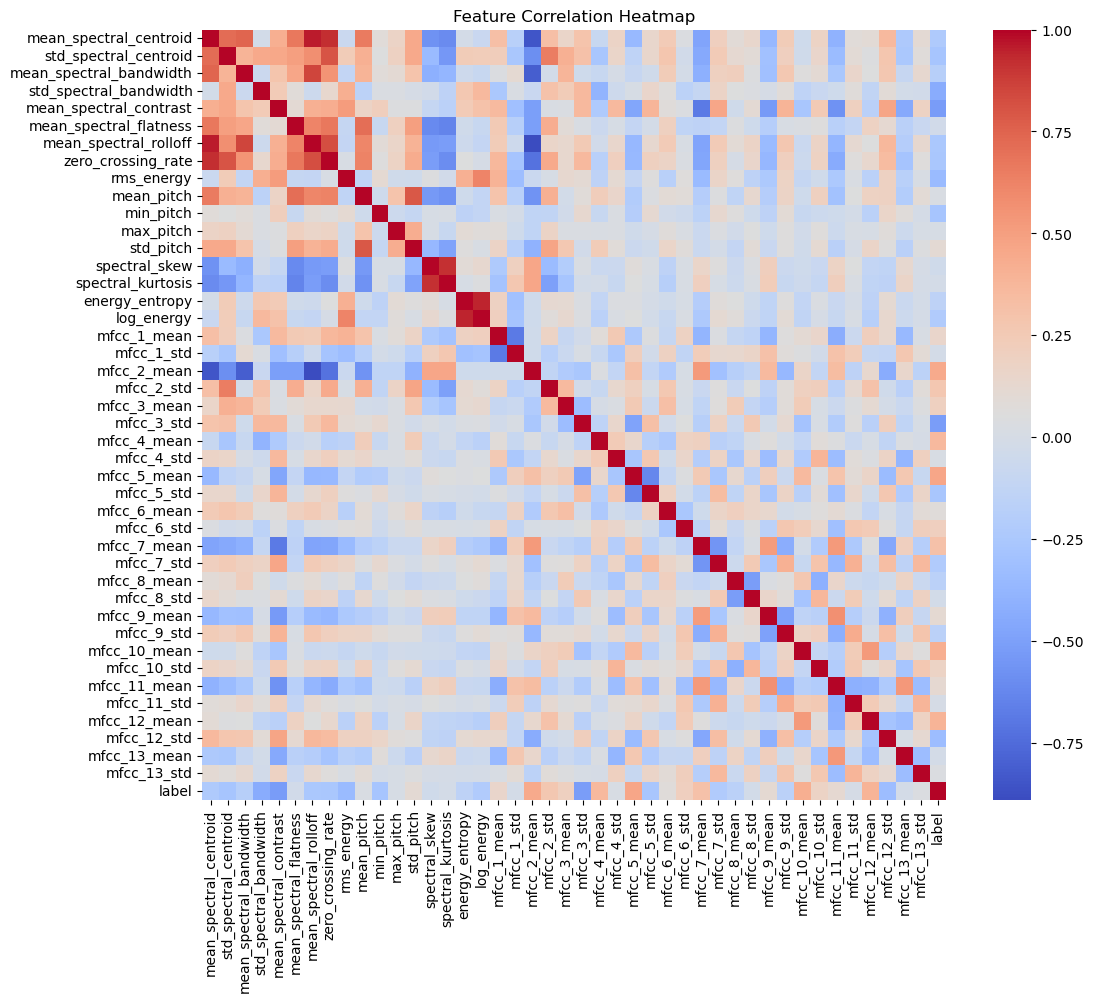

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = voice_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
x = voice_data.drop('label', axis = 1)
y = voice_data['label']

In [13]:
len(x)

15070

In [14]:
if 0 in x:
    print("There is 0")

else:
    print('no zero')

no zero


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .20, random_state= 1)

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


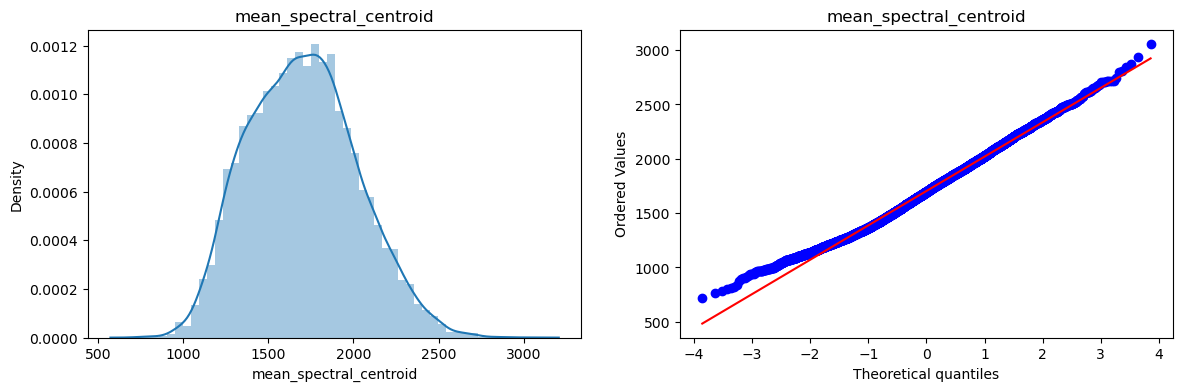

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


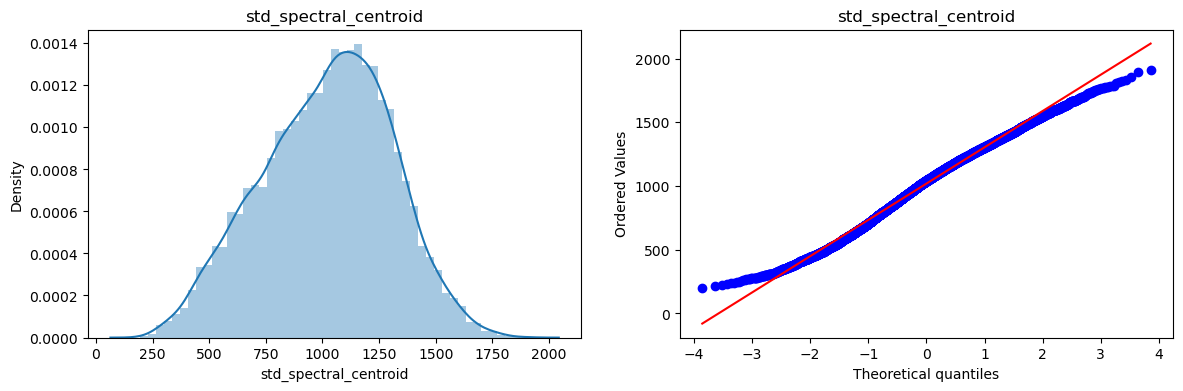

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


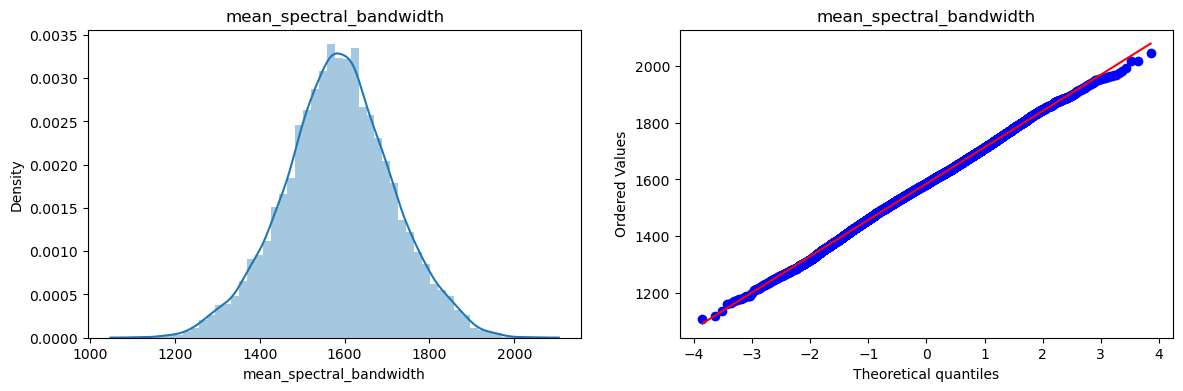

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


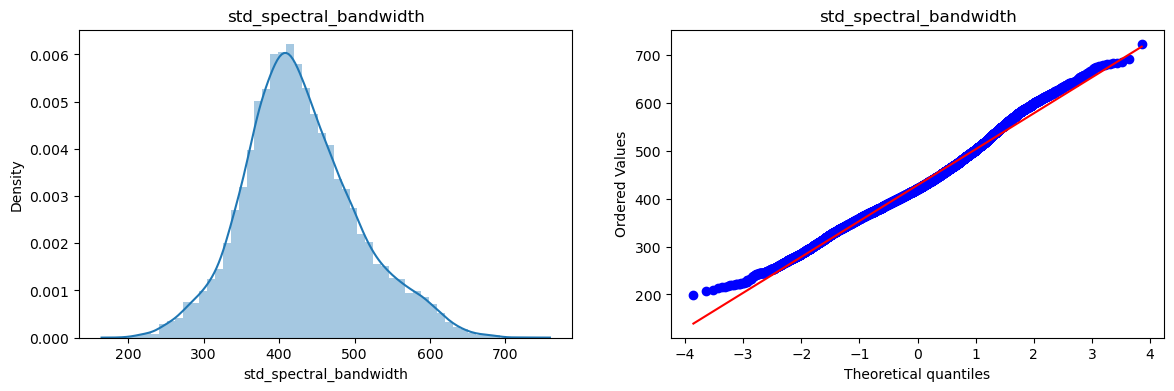

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


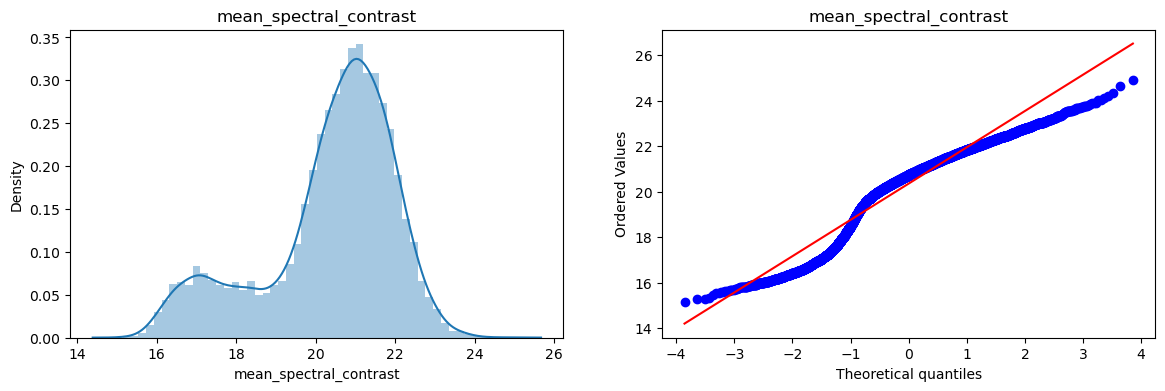

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


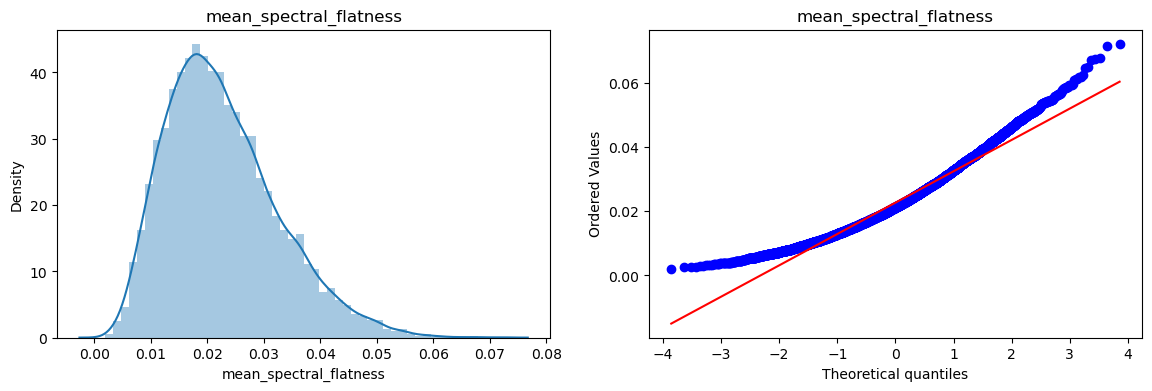

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


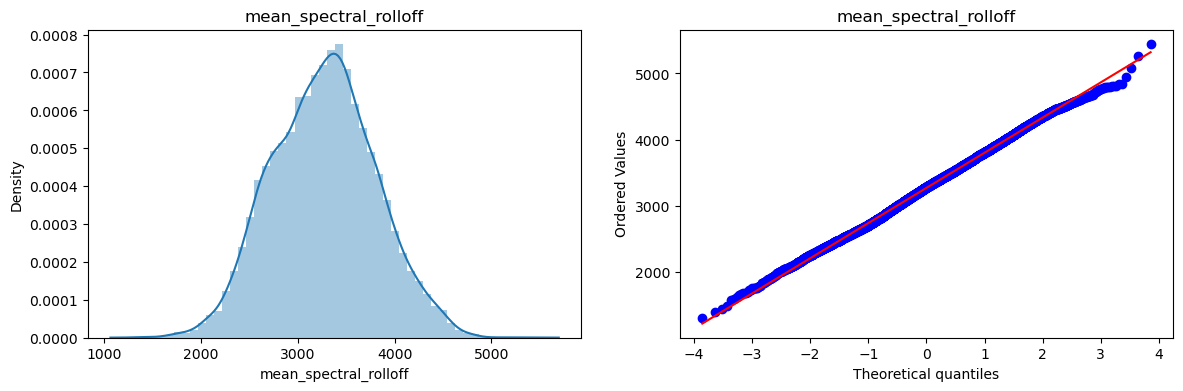

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


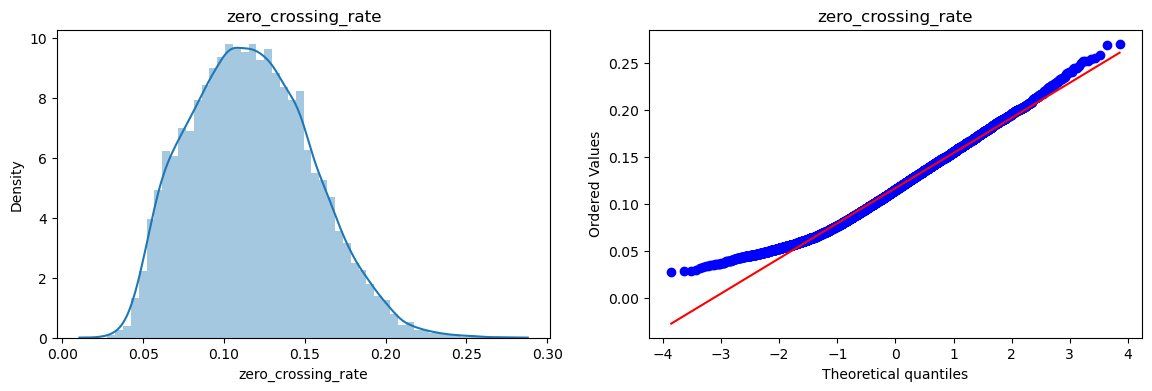

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


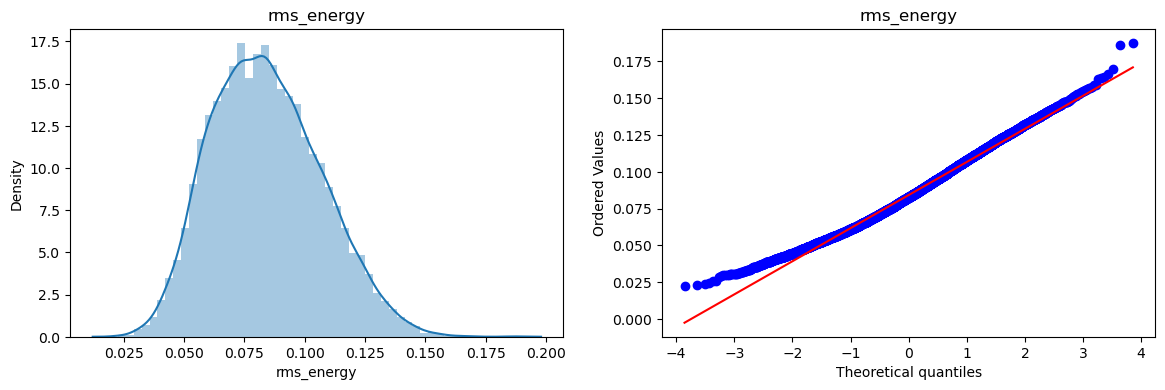

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


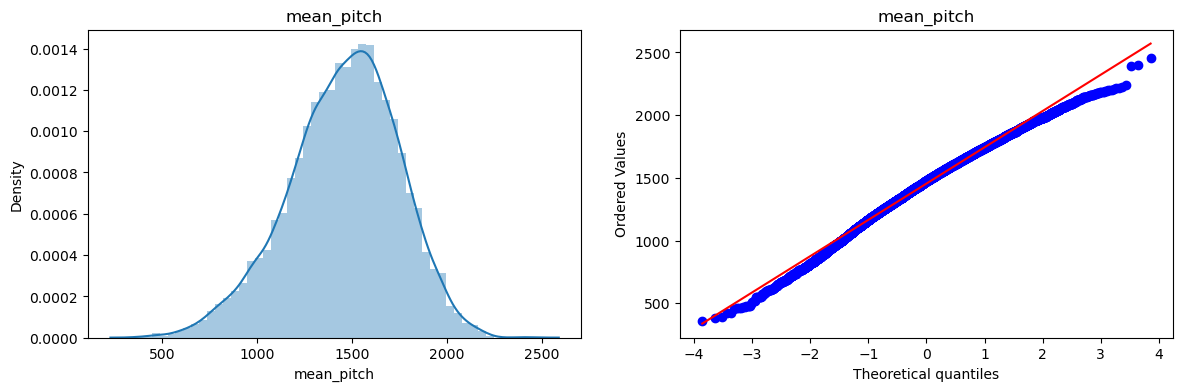

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


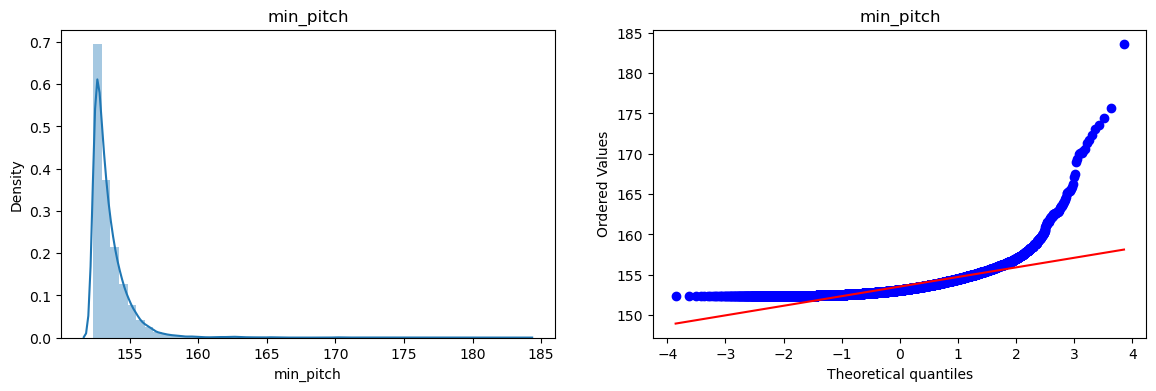

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


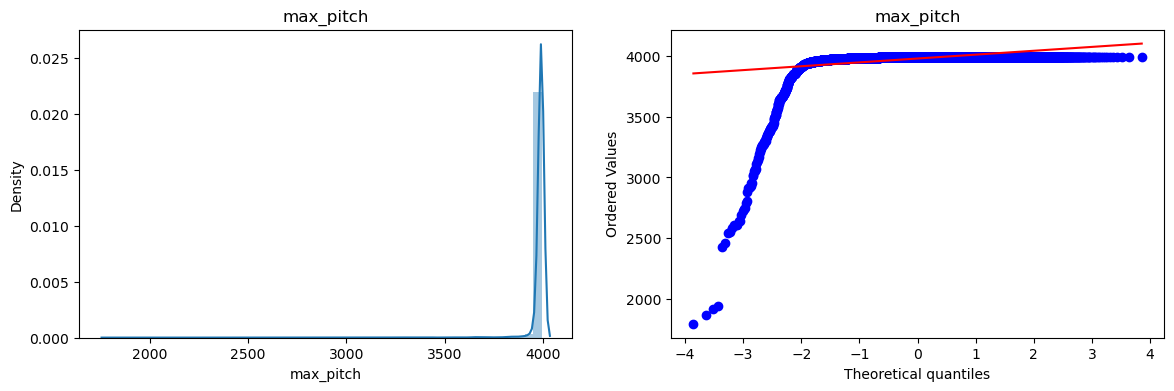

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


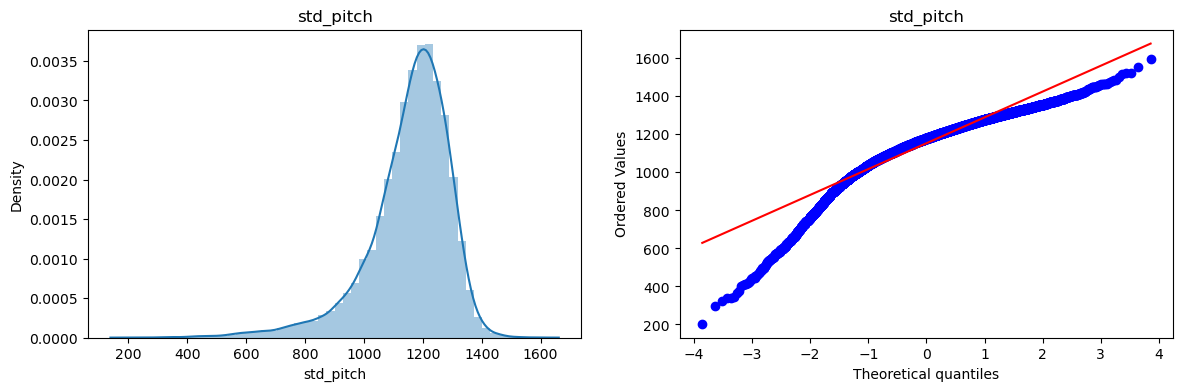

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


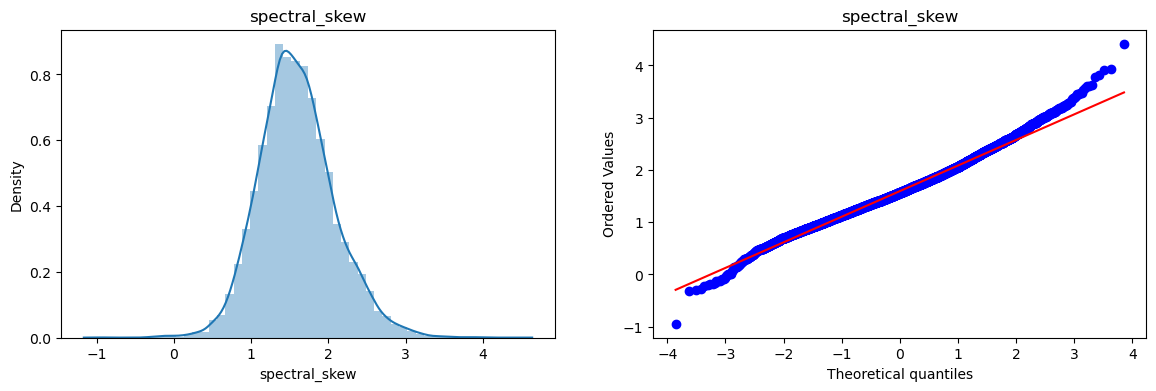

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


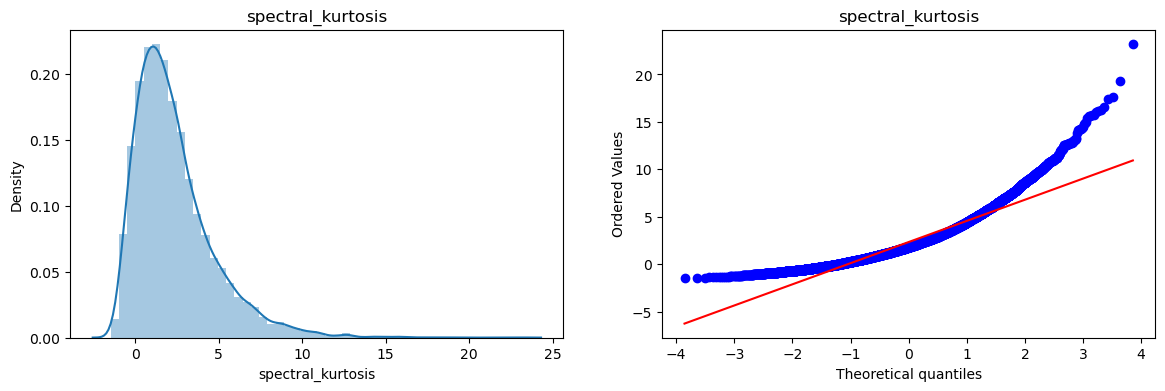

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


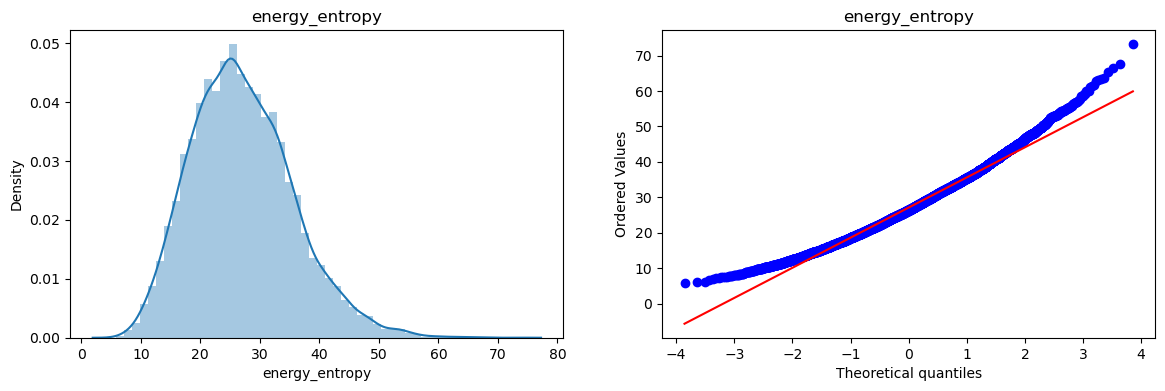

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


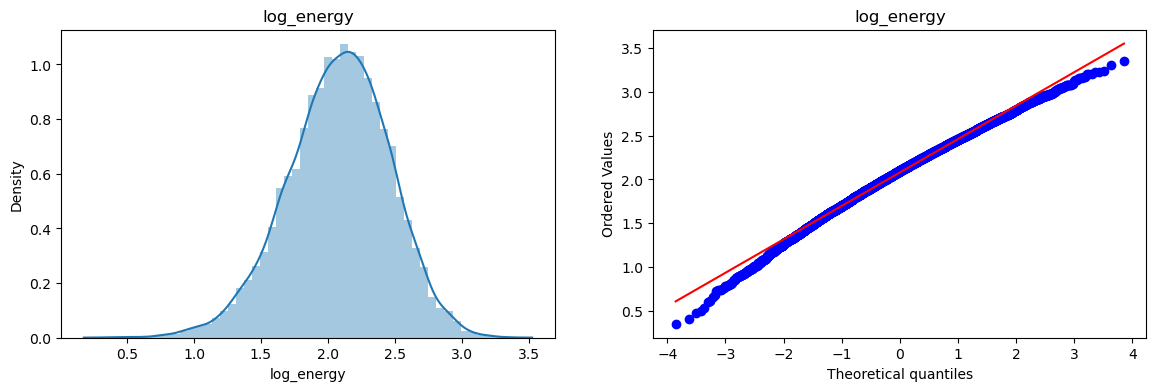

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


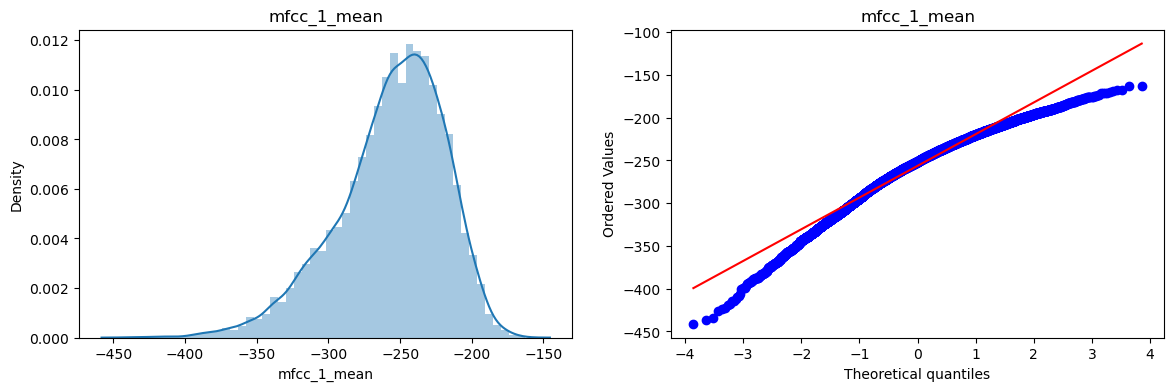

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


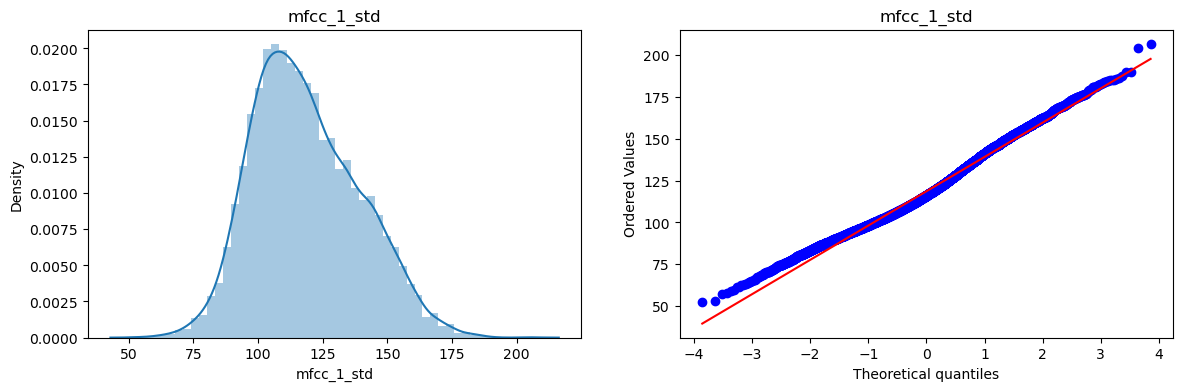

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


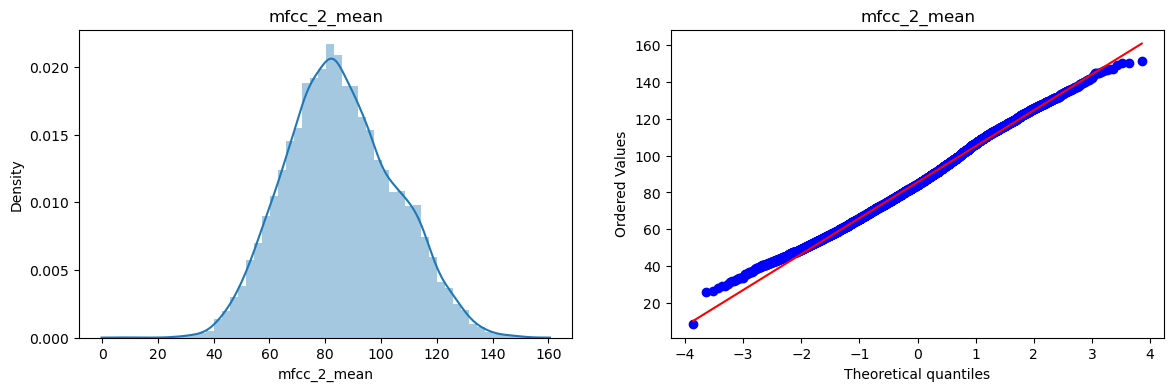

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


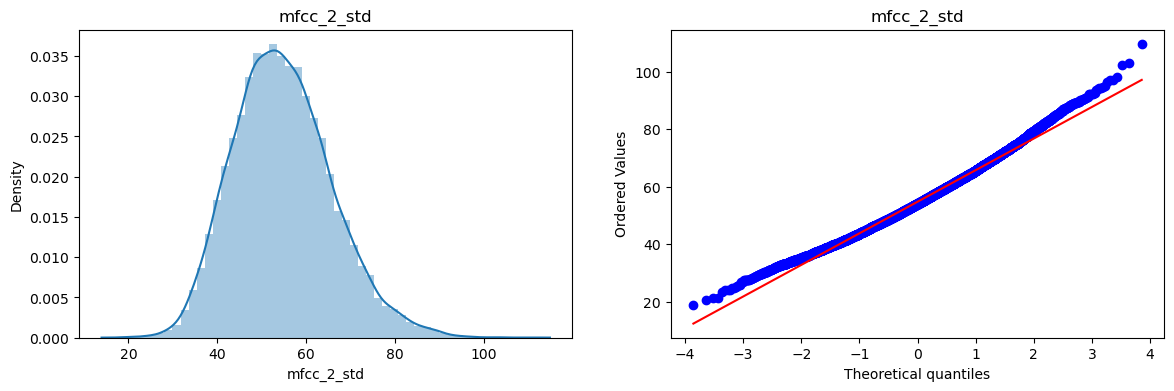

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


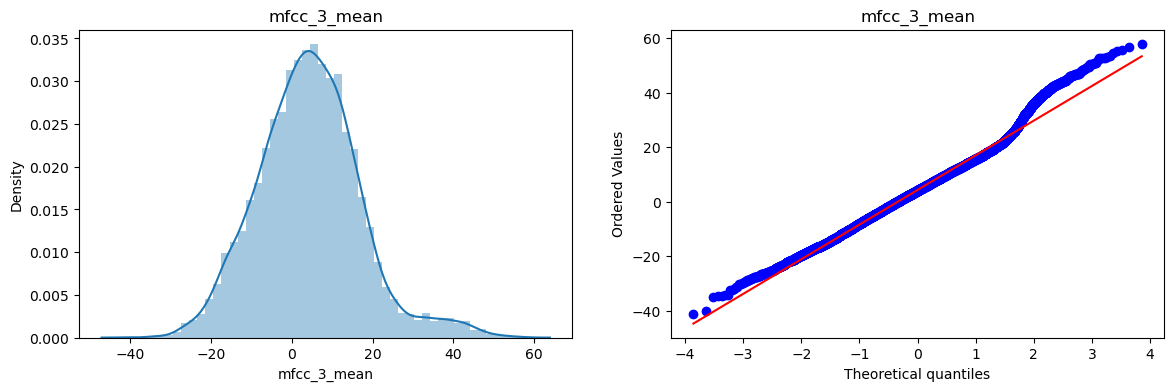

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


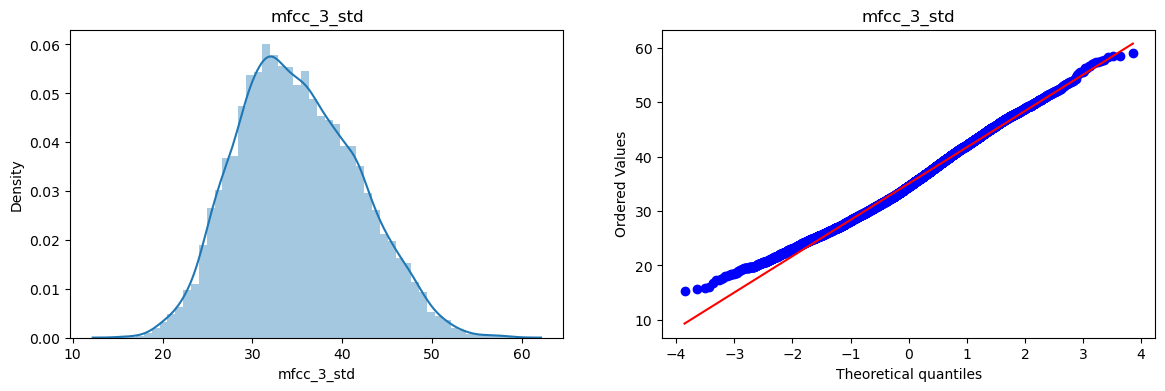

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


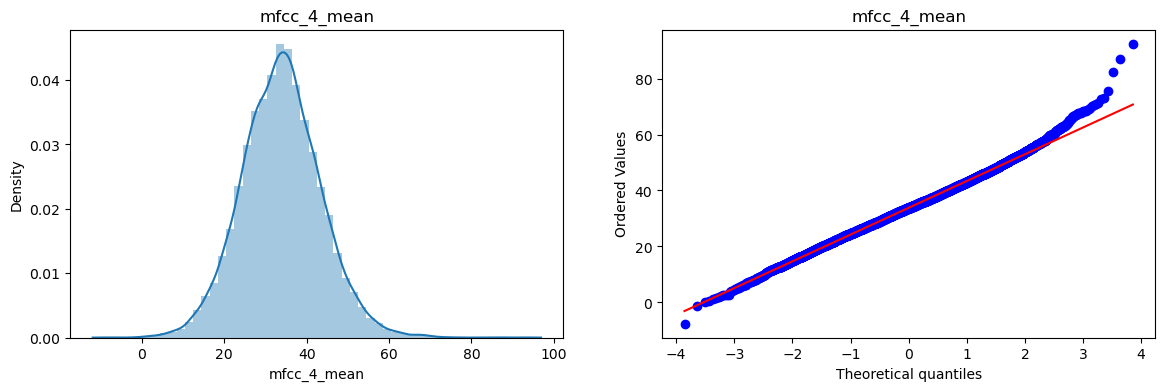

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


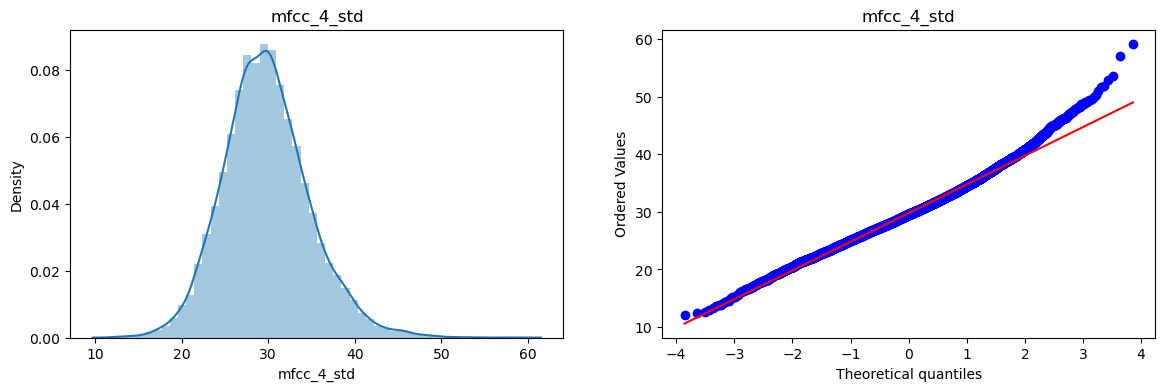

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


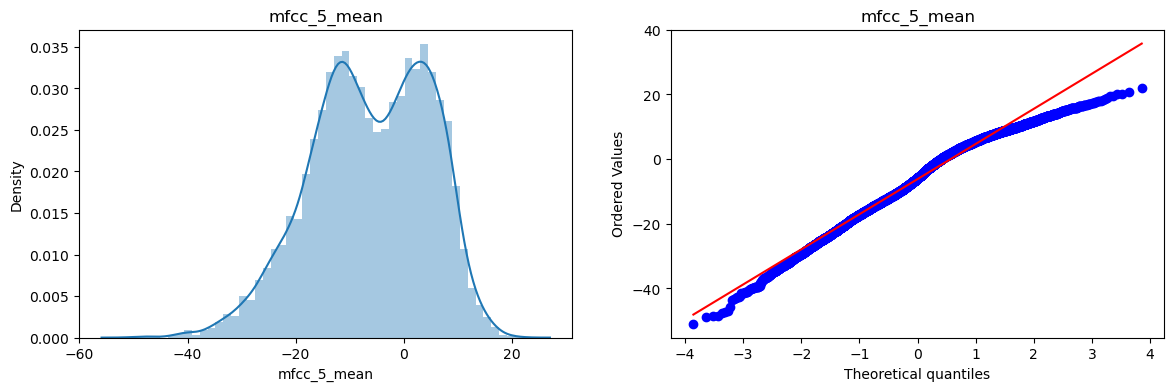

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


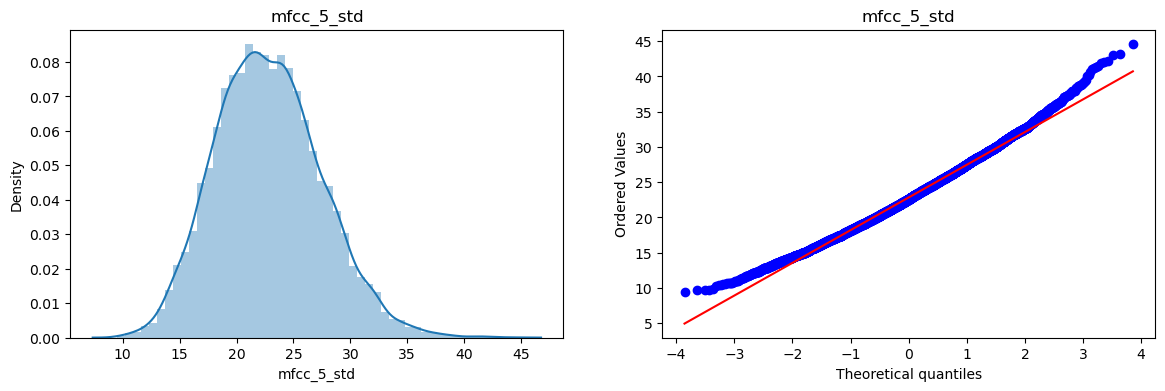

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


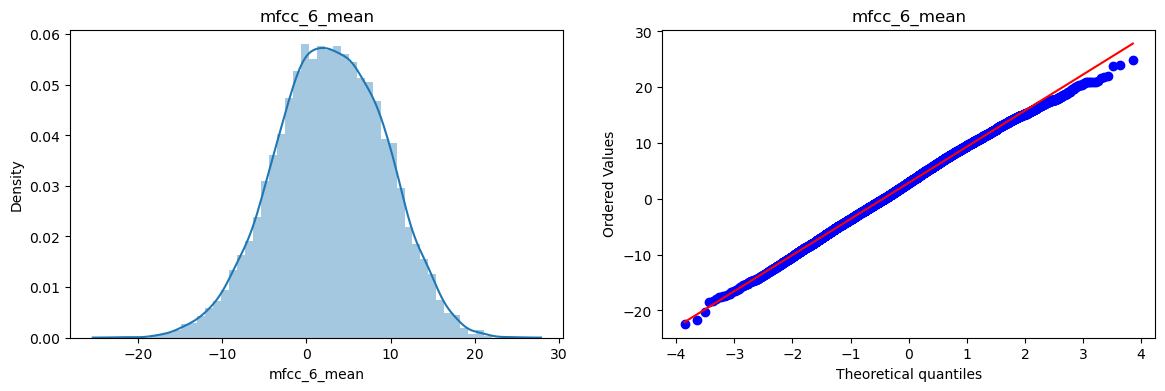

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


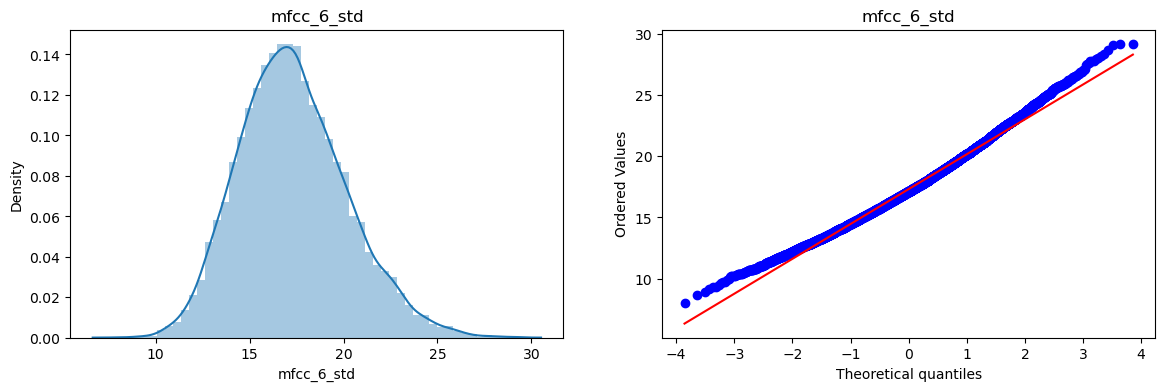

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


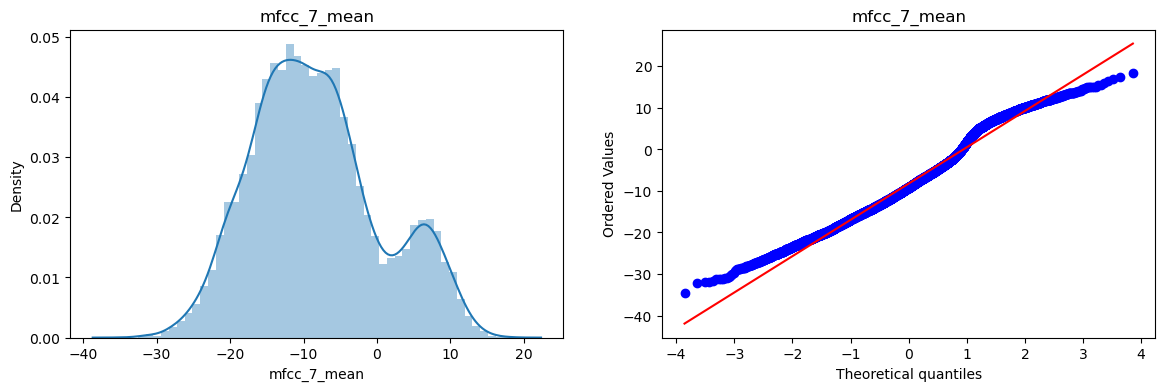

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


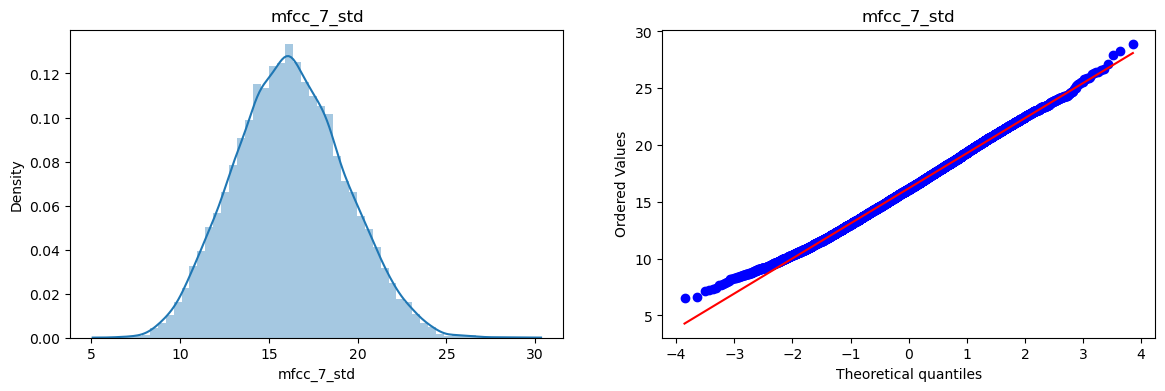

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


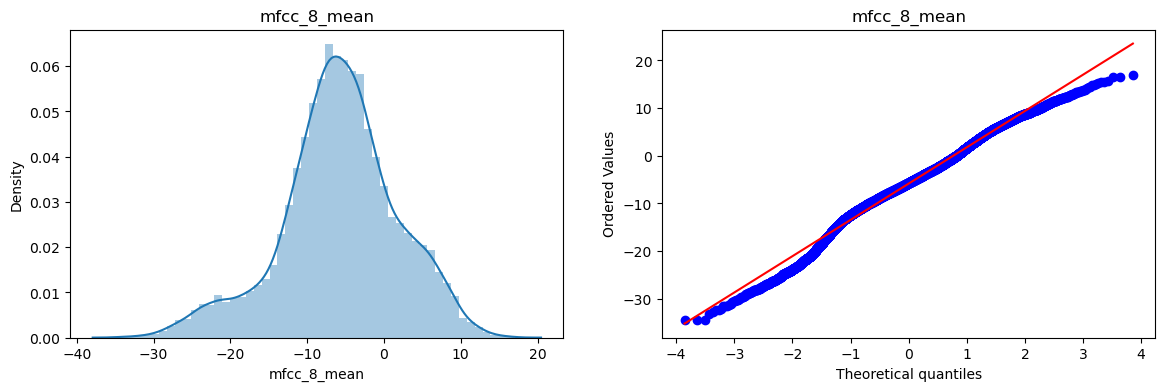

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


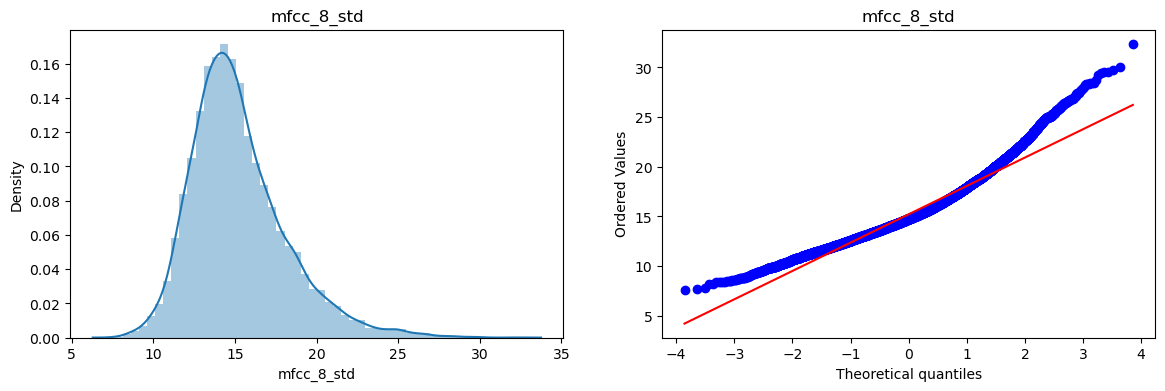

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


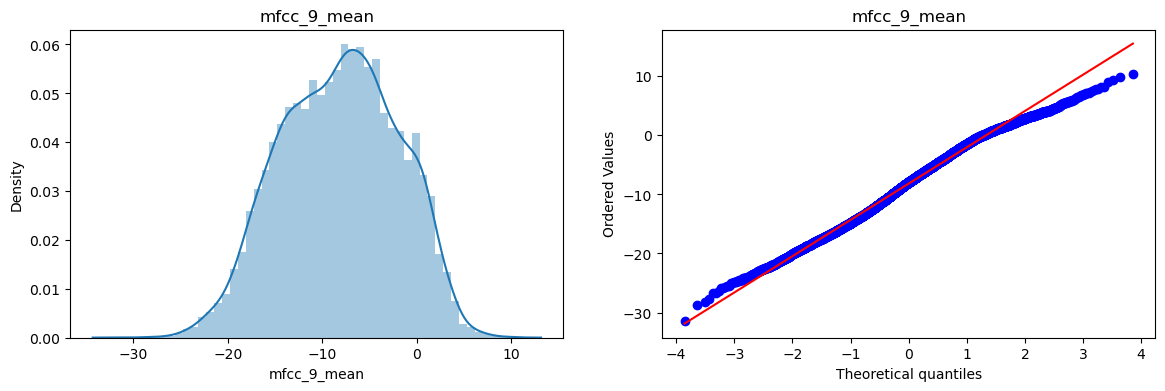

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


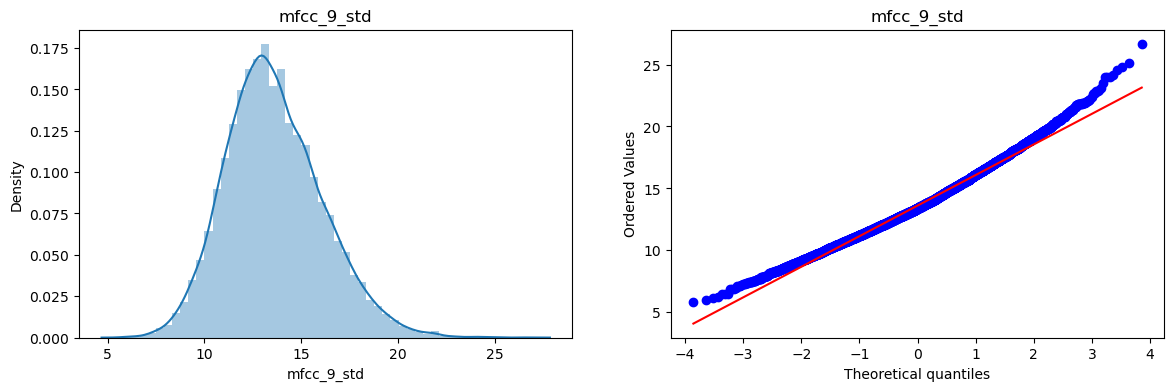

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


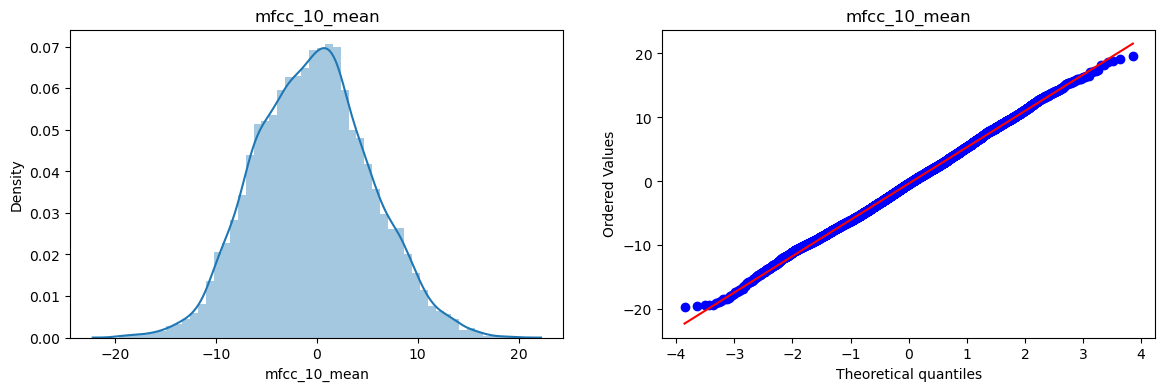

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


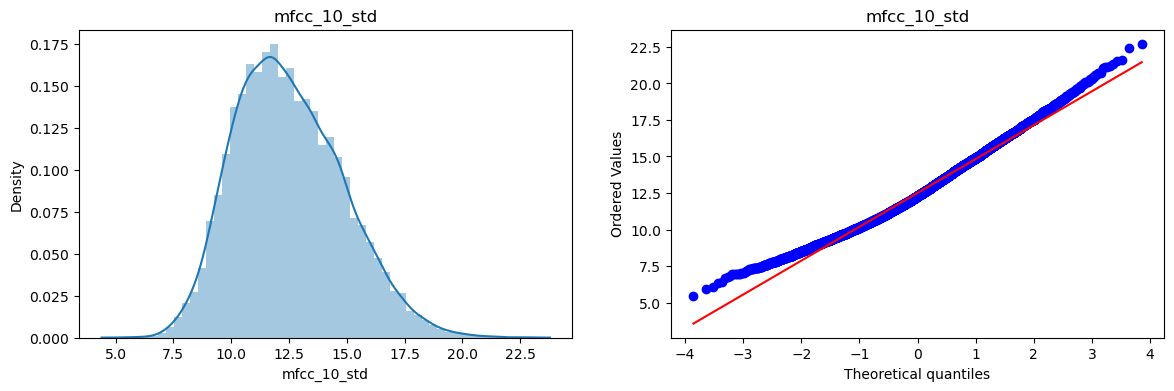

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


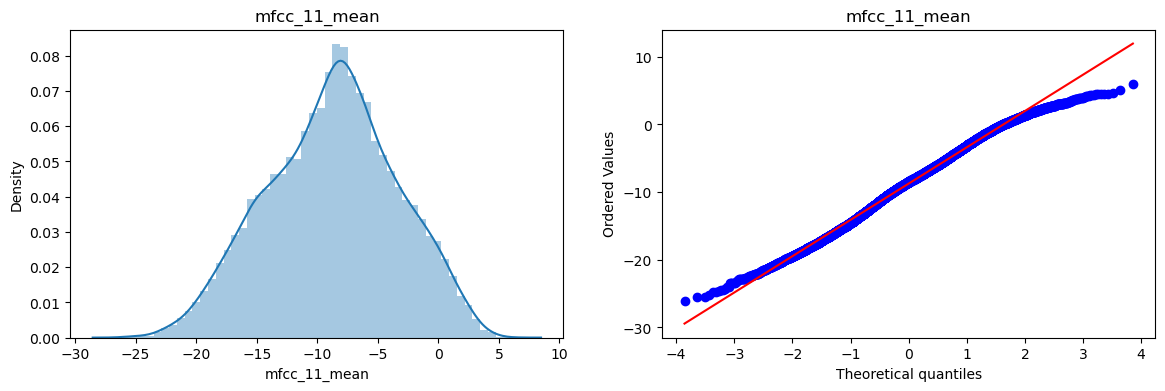

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


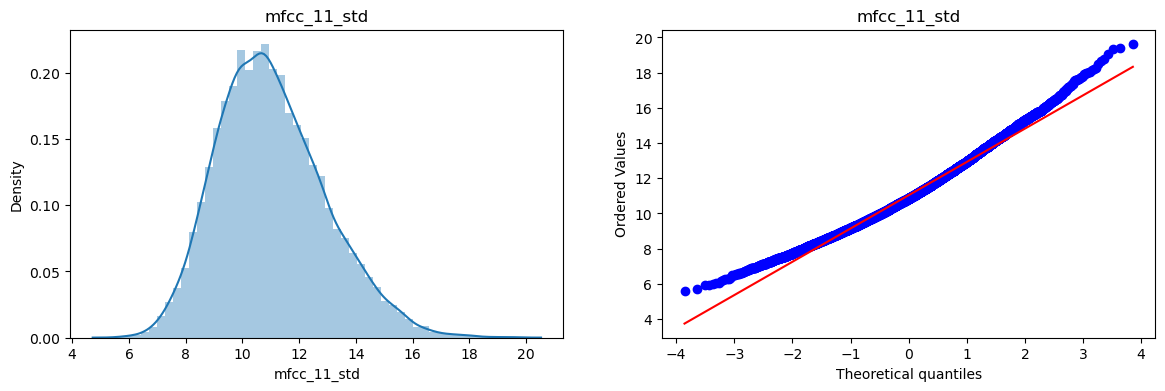

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


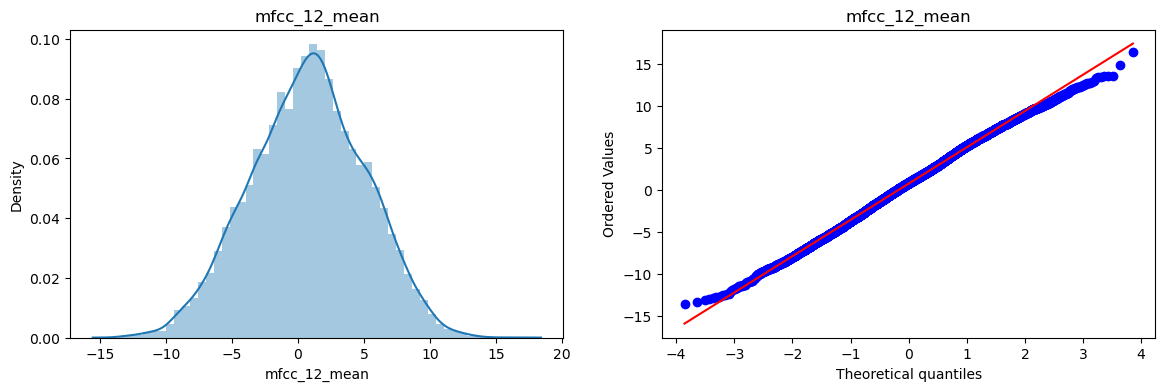

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


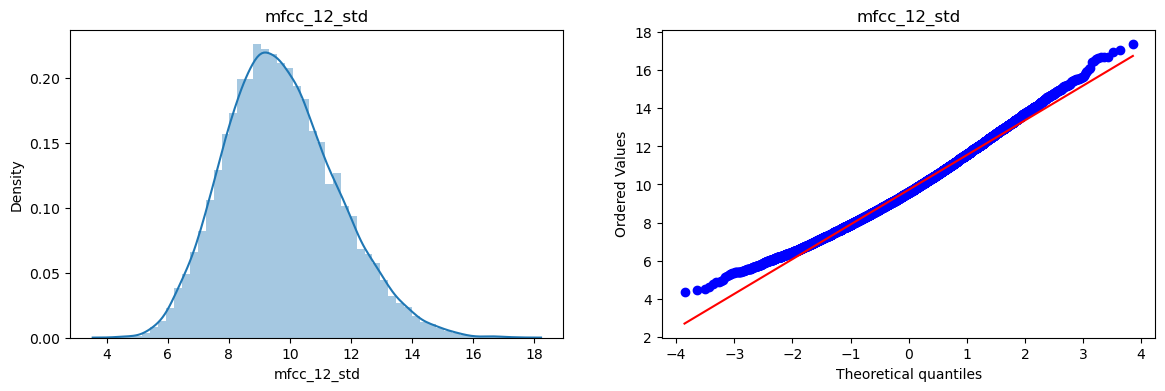

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


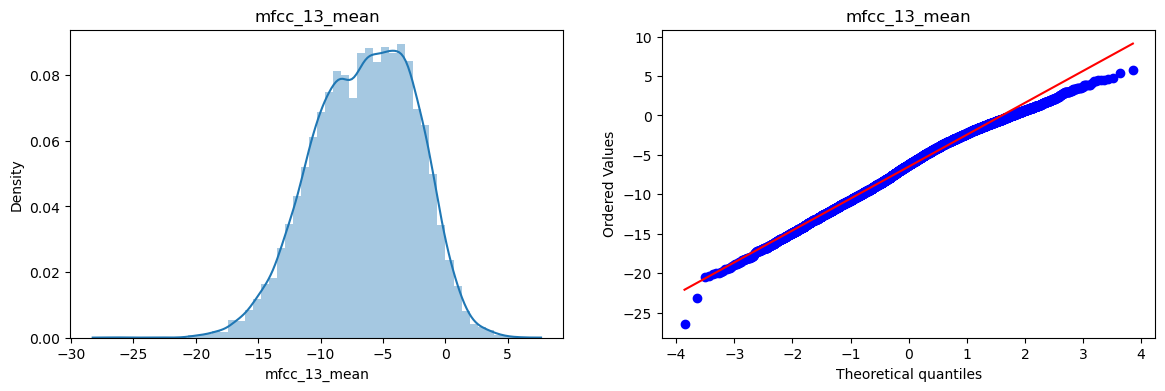

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\506833951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


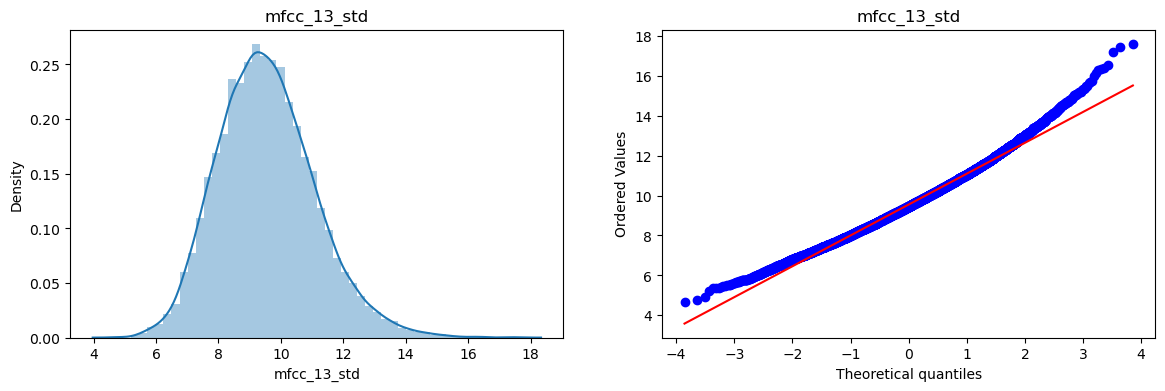

In [16]:
import scipy.stats as stats

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [18]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(x_balanced)
X_test_transformed = pt.transform(x_test)

c:\Users\Tisha Biswas\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Tisha Biswas\anaconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [19]:
df_X_train_transformed = pd.DataFrame(X_train_transformed, columns =  ['mean_spectral_centroid',	'std_spectral_centroid','mean_spectral_bandwidth','std_spectral_bandwidth','mean_spectral_contrast','mean_spectral_flatness','mean_spectral_rolloff','zero_crossing_rate',	'rms_energy','mean_pitch',	'min_pitch','max_pitch',	'std_pitch','spectral_skew','spectral_kurtosis','energy_entropy','log_energy','mfcc_1_mean','mfcc_1_std','mfcc_2_mean',	'mfcc_2_std','mfcc_3_mean',	'mfcc_3_std',	'mfcc_4_mean',	'mfcc_4_std','mfcc_5_mean',	'mfcc_5_std','mfcc_6_mean',	'mfcc_6_std','mfcc_7_mean','mfcc_7_std','mfcc_8_mean','mfcc_8_std','mfcc_9_mean','mfcc_9_std','mfcc_10_mean','mfcc_10_std','mfcc_11_mean','mfcc_11_std','mfcc_12_mean','mfcc_12_std','mfcc_13_mean','mfcc_13_std'
] )

df_X_train_transformed

mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0                    0.720732               1.171535                -0.117546   
1                    1.234920               1.564745                 0.746290   
2                   -1.926092              -0.814765                -1.473190   
3                   -0.129062               0.410447                -0.385838   
4                    0.699606               1.128192                -0.086458   
...                       ...                    ...                      ...   
15759               -0.076165              -0.709475                 0.784696   
15760                1.088667               0.880768                 1.009225   
15761                1.113479               1.282573                -0.142783   
15762                0.034616               0.319525                 0.186524   
15763                1.363094               2.427199                -0.503435   

       std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0                    0.903907               -0.203486                0.275703   
1                    1.231481                0.755942                0.738430   
2                    0.438231               -0.743630               -0.265822   
3                   -1.477199               -0.065147                0.132866   
4                    0.459565                1.751764               -0.883512   
...                       ...                     ...                     ...   
15759               -0.137620                0.348607               -0.467504   
15760                1.363882                0.094096                0.745508   
15761                1.806019               -0.426092                2.387178   
15762                0.653891                0.004107                0.521950   
15763                1.468505                1.217337                0.012981   

       mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ...  \
0                   0.444175            0.906701   -0.746614   -0.435179  ...   
1                   1.168794            1.170793    1.143480    0.715188  ...   
2                  -2.083726           -1.039619   -0.287888   -1.075063  ...   
3                  -0.159332           -0.120864   -0.395083    0.211942  ...   
4                   0.471068            0.870556    0.557665   -1.594140  ...   
...                      ...                 ...         ...         ...  ...   
15759               0.232339           -0.125593   -0.166667   -0.448693  ...   
15760               0.999074            0.891774    0.467899    0.298694  ...   
15761               0.874525            1.322765   -0.399421    2.383851  ...   
15762              -0.035664            0.178049    0.069517    0.383571  ...   
15763               0.317910            1.685668    1.076763   -0.805889  ...   

       mfcc_9_mean  mfcc_9_std  mfcc_10_mean  mfcc_10_std  mfcc_11_mean  \
0         0.280490   -0.000225     -0.250120     0.397686      0.595891   
1         0.600774   -0.365350     -1.377854    -0.036685     -0.356497   
2        -0.205071   -0.395177      0.919571     1.041022      0.706321   
3         0.525271   -0.575128     -0.313561    -0.375148      1.105854   
4        -0.019391   -1.024745     -0.425173     1.070089     -0.609894   
...            ...         ...           ...          ...           ...   
15759    -0.221569   -0.422615     -0.317406    -0.522009      0.066480   
15760     0.087969   -0.182126      0.305635    -0.377526     -0.447333   
15761     0.070382   -0.625434     -0.799256    -0.359619      0.597123   
15762    -0.053081   -0.238175      0.281134    -0.770210     -1.171874   
15763     0.034058   -1.489210      1.375721    -0.724090     -0.846913   

       mfcc_11_std  mfcc_12_mean  mfcc_12_std  mfcc_13_mean  mfcc_13_std  
0        -0.422482     -1.117309    -0.072172     -0.572318     0.666665  
1        -0.705620      0.306235    -

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


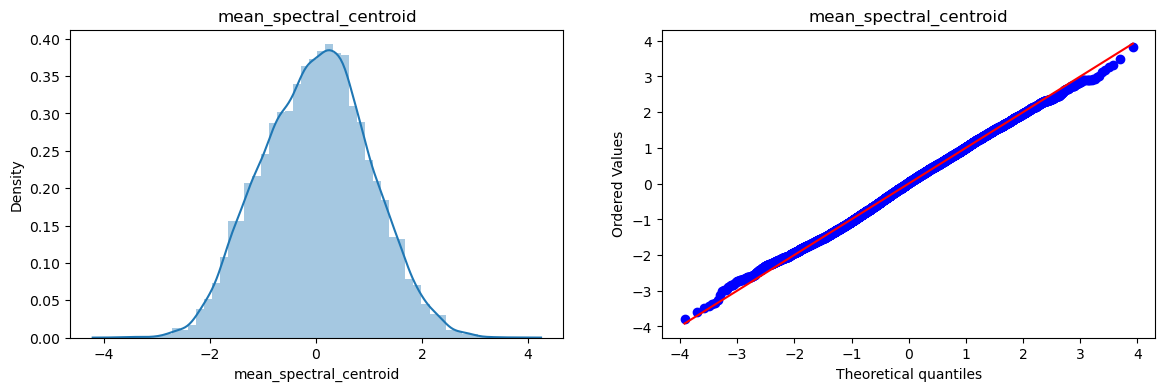

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


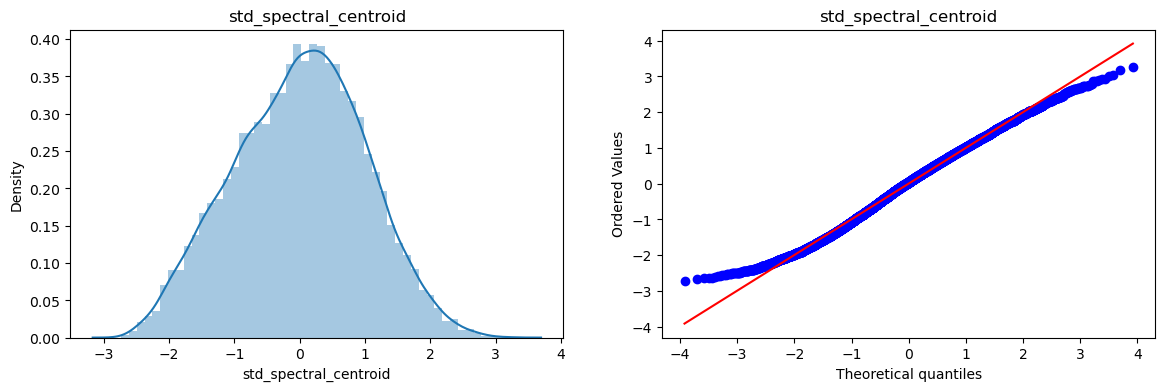

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


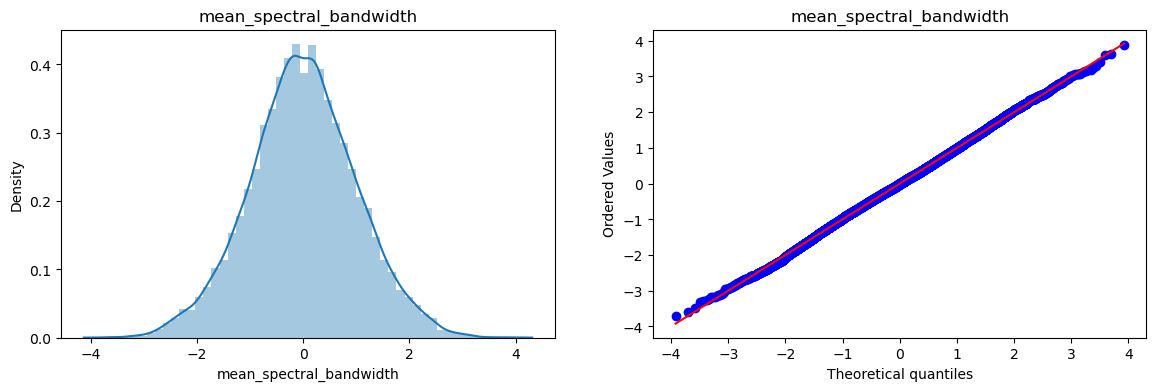

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


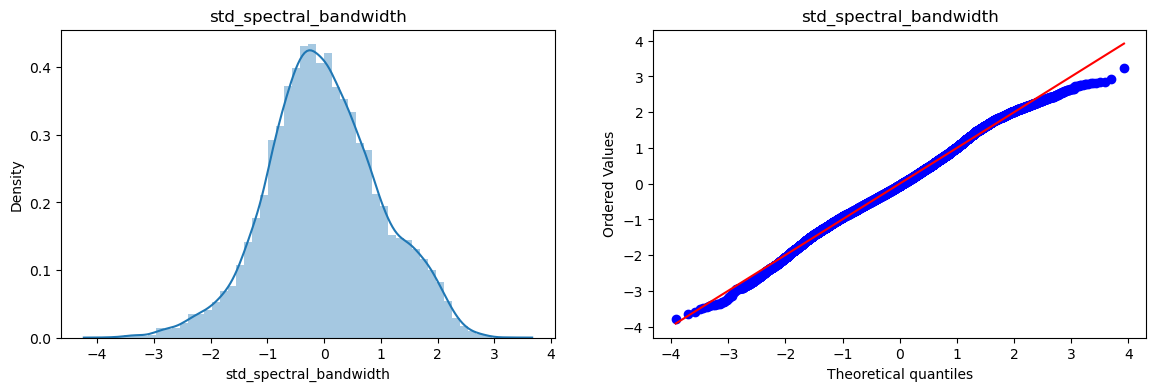

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


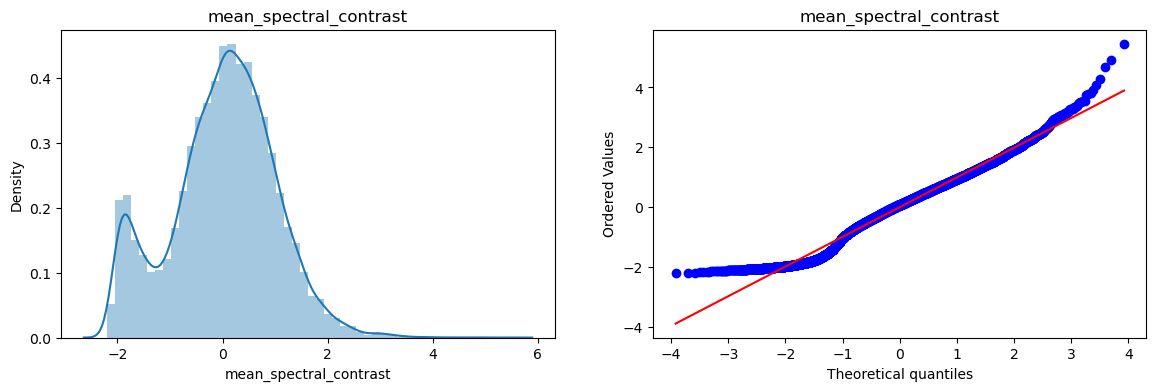

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


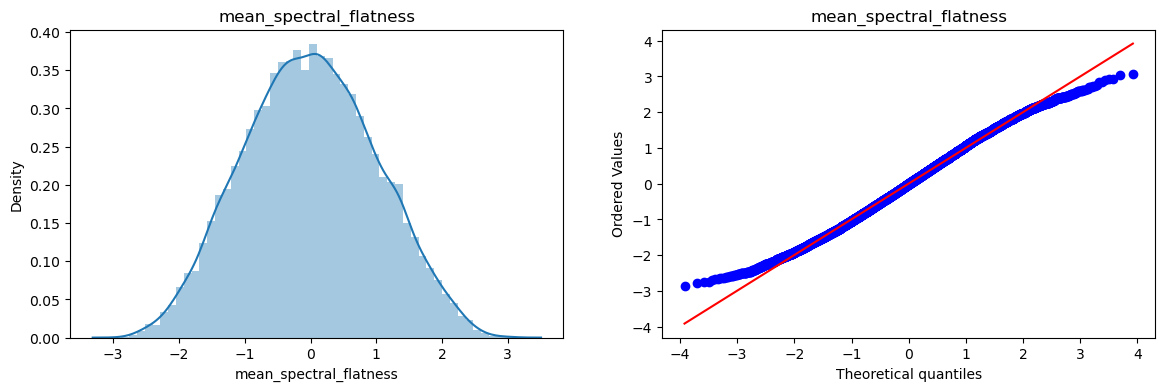

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


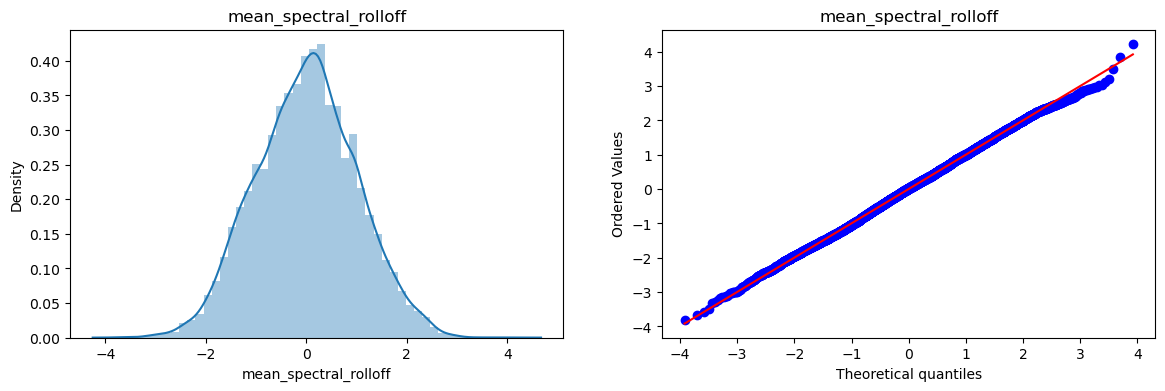

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


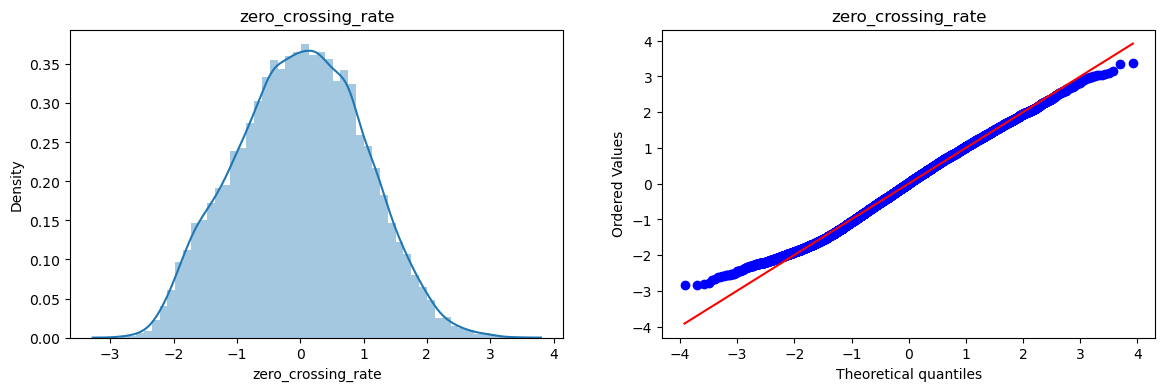

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


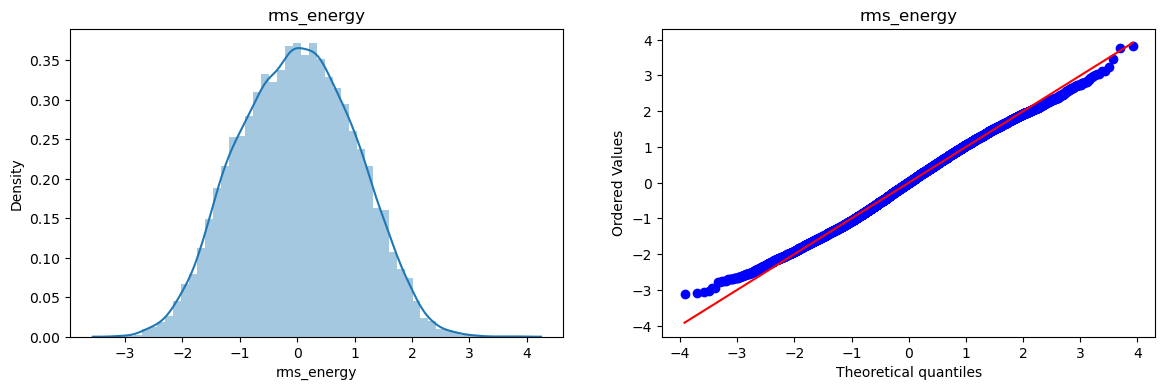

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


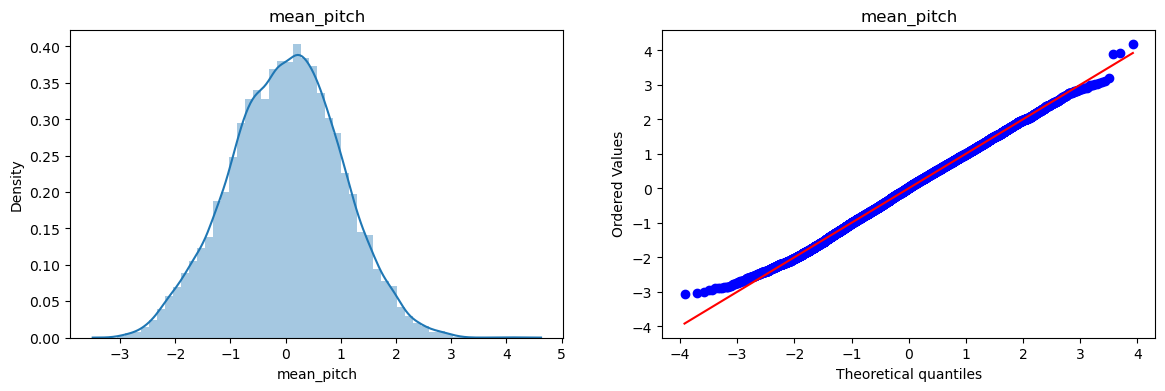

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


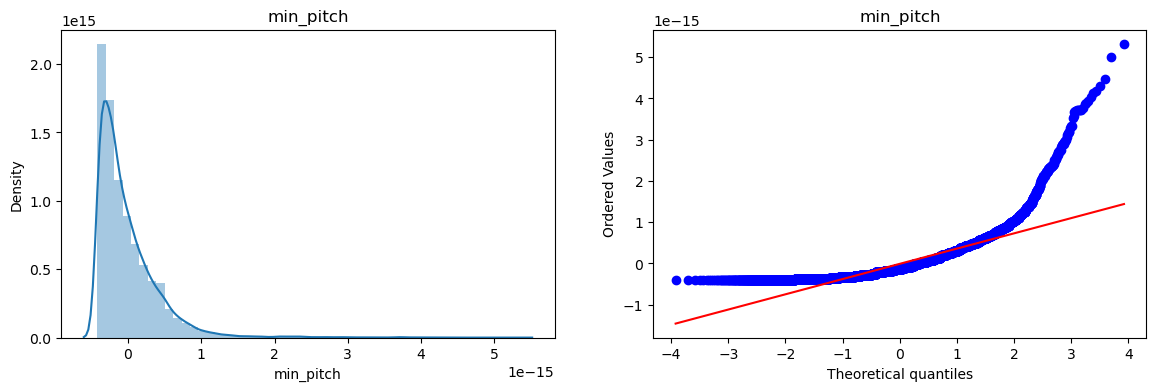

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


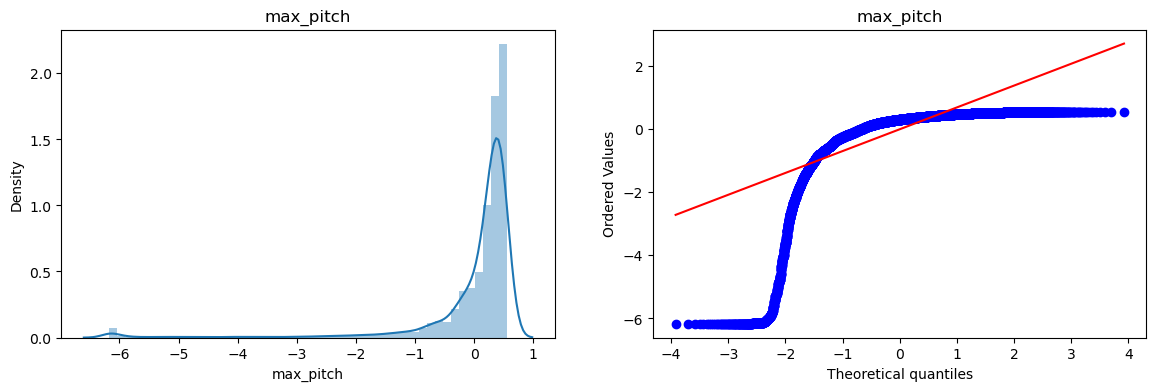

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


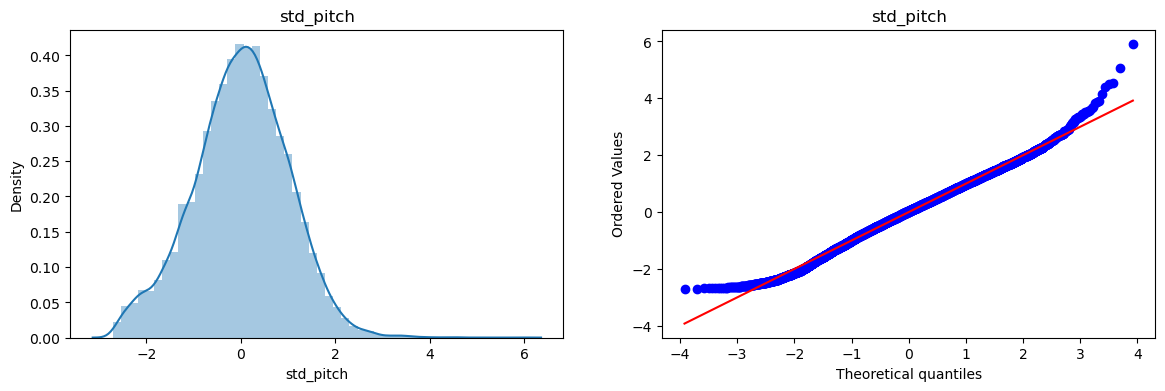

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


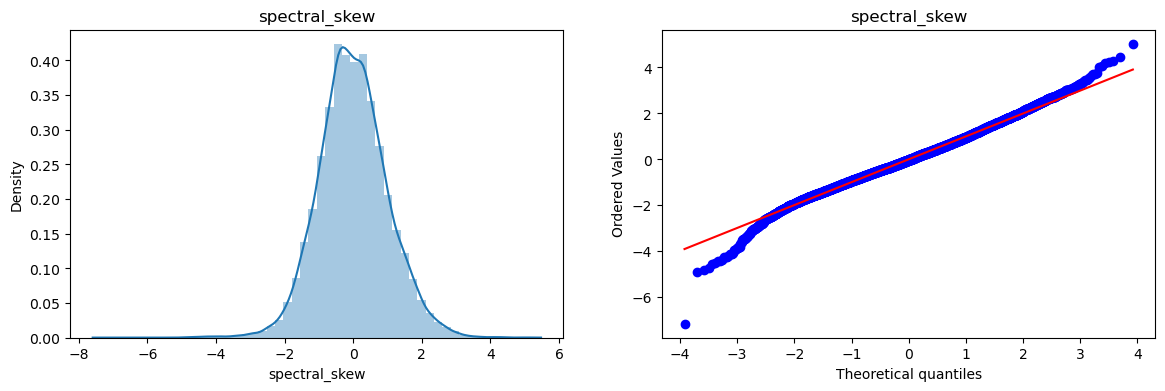

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


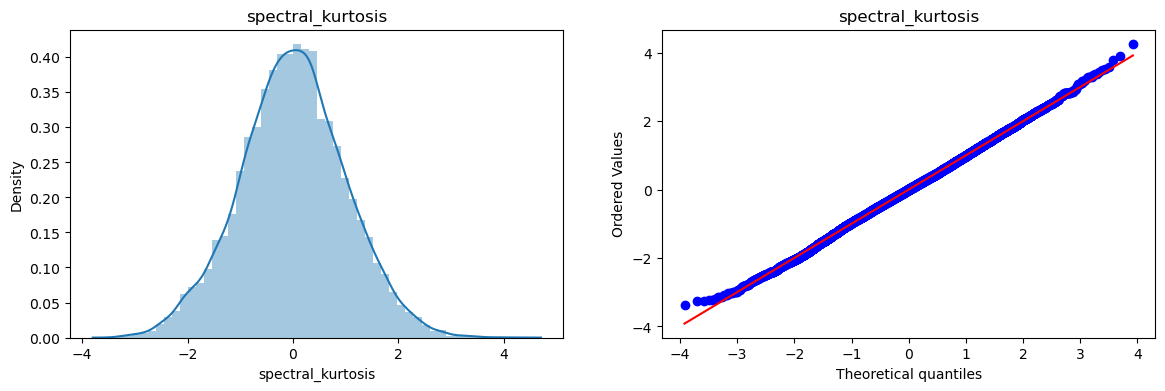

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


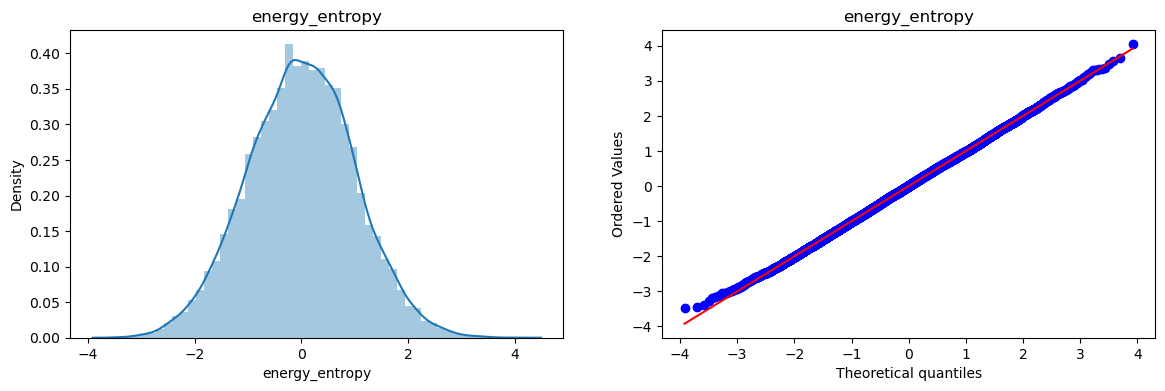

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


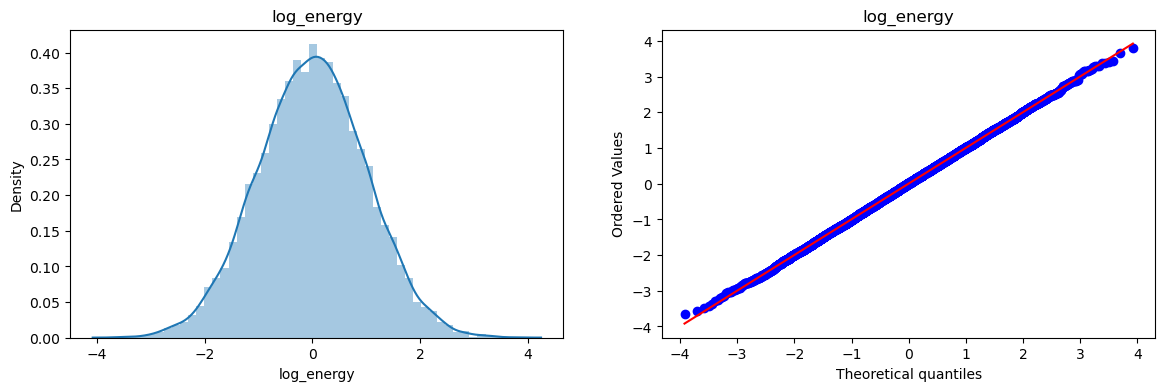

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


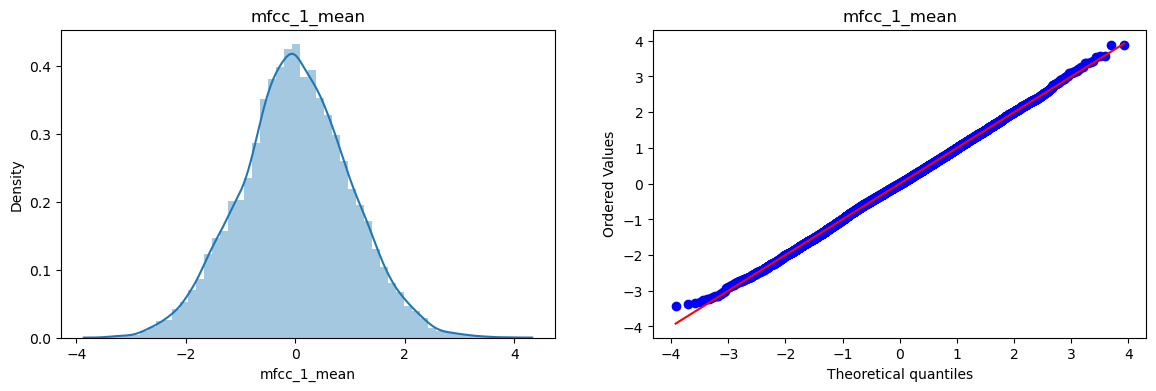

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


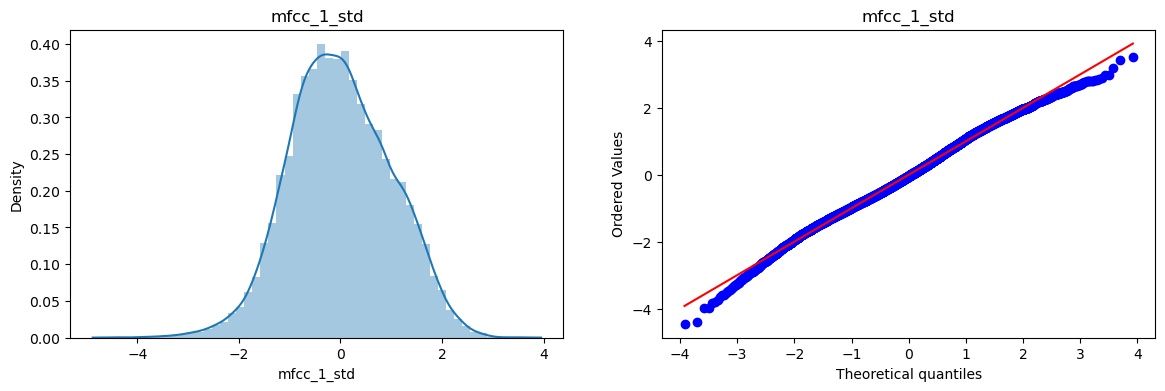

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


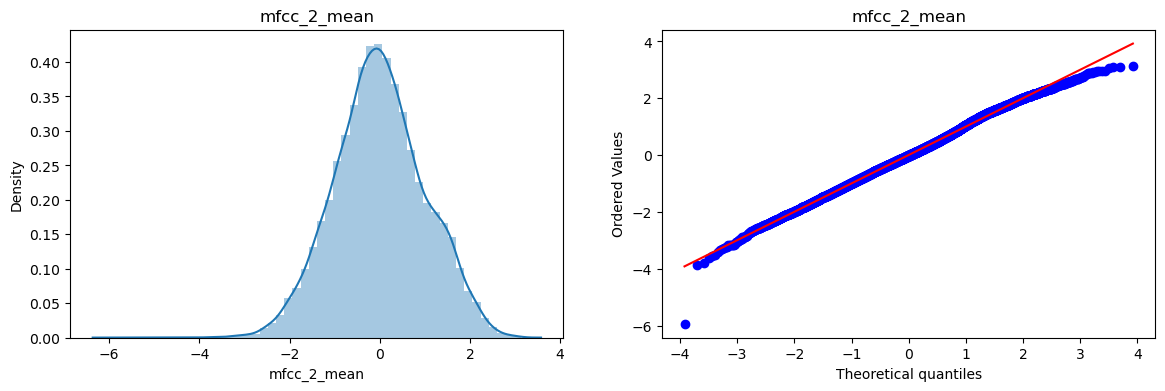

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


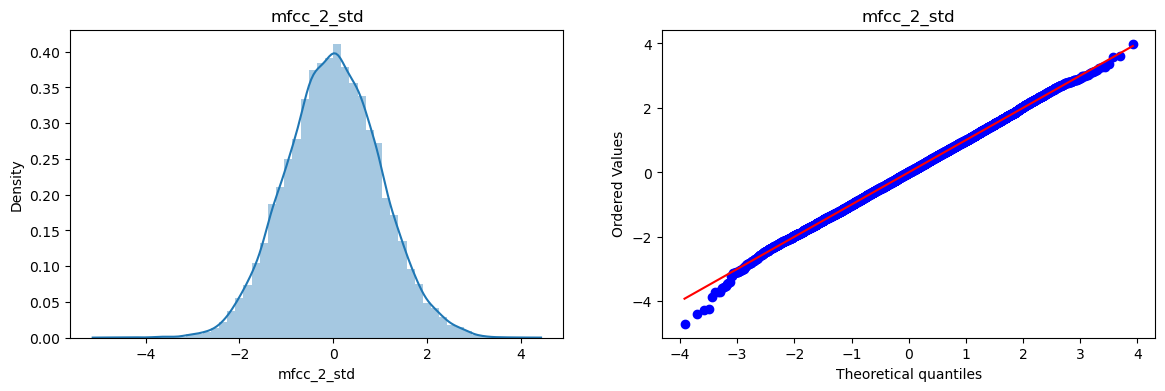

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


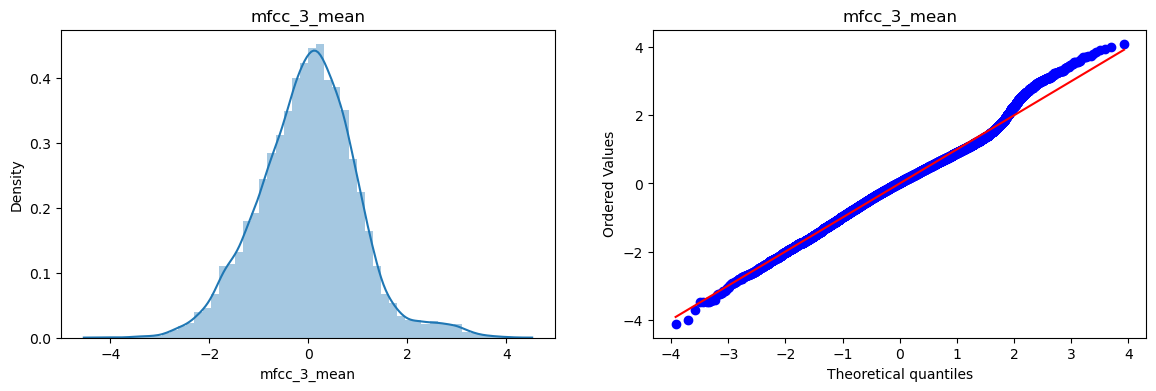

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


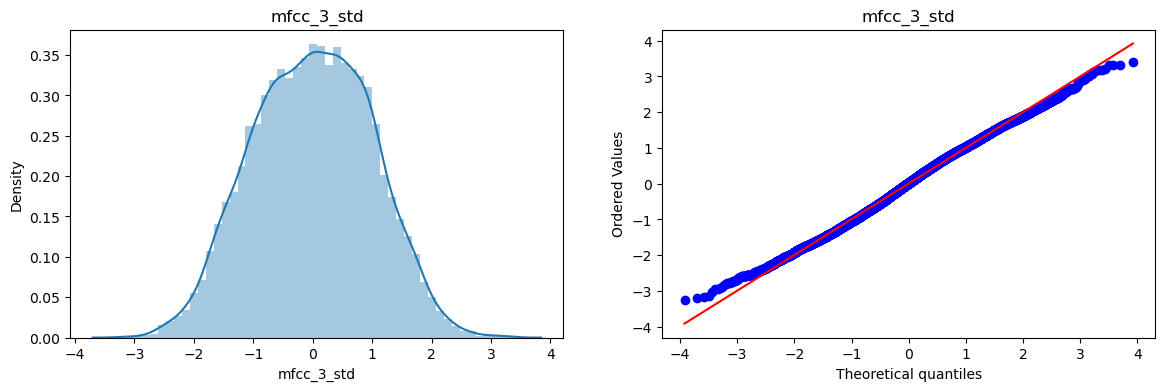

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


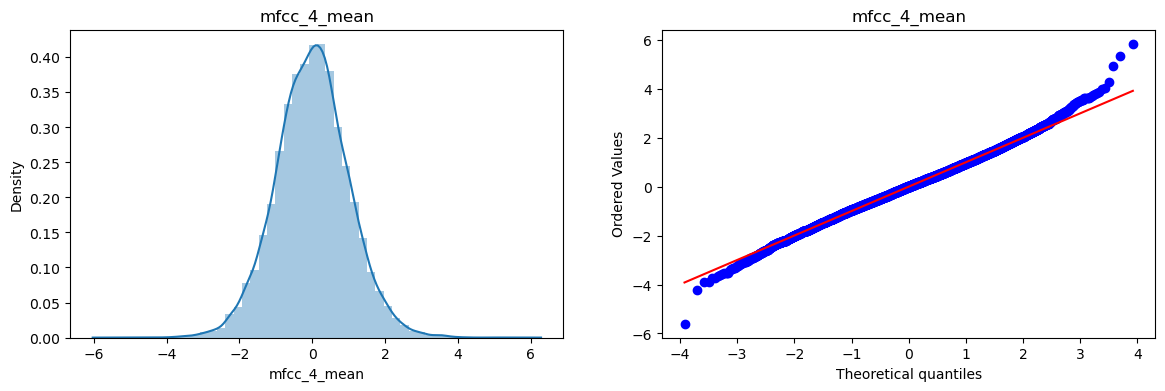

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


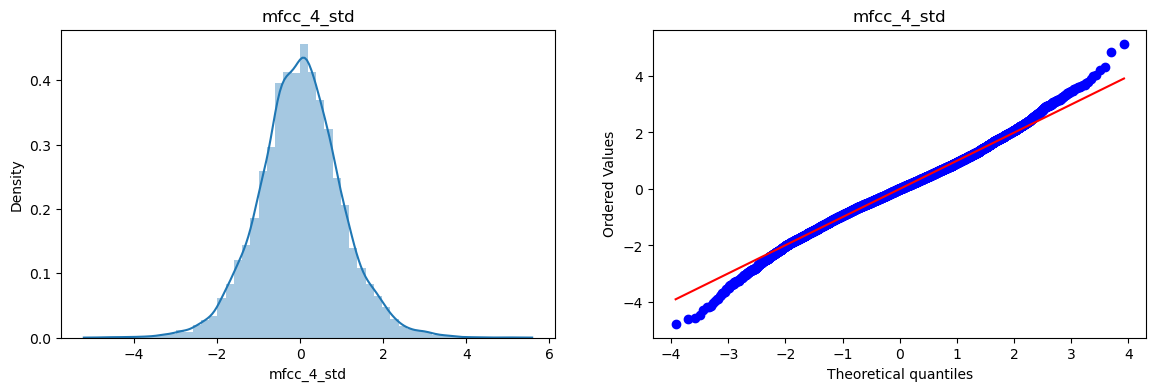

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


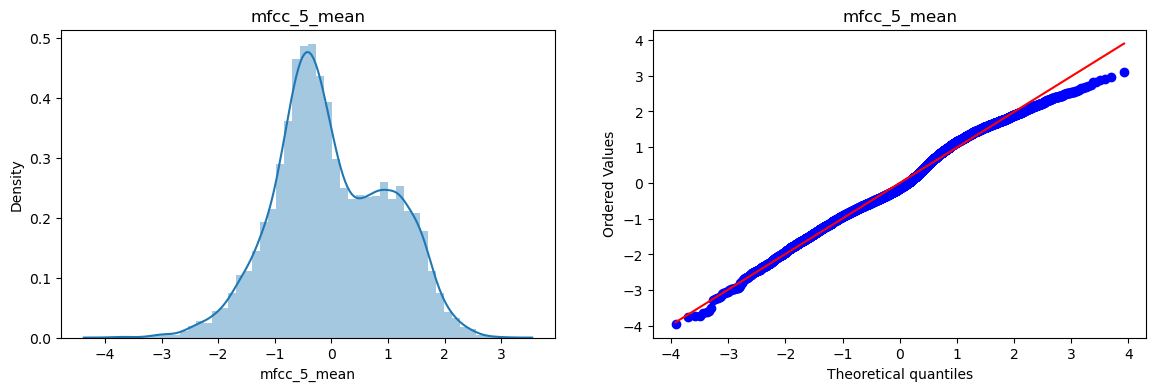

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


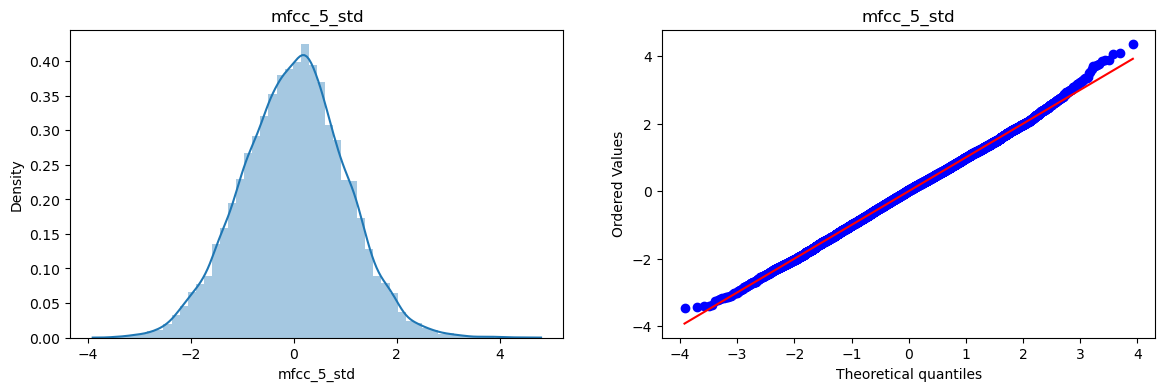

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


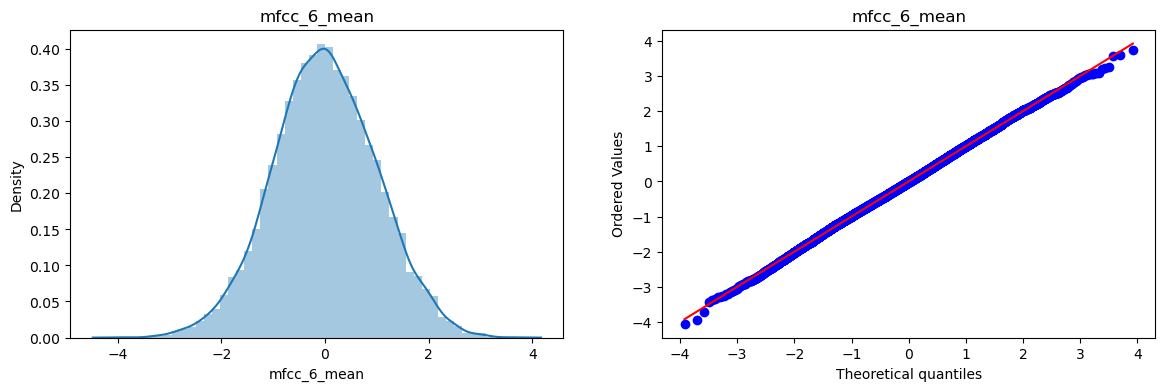

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


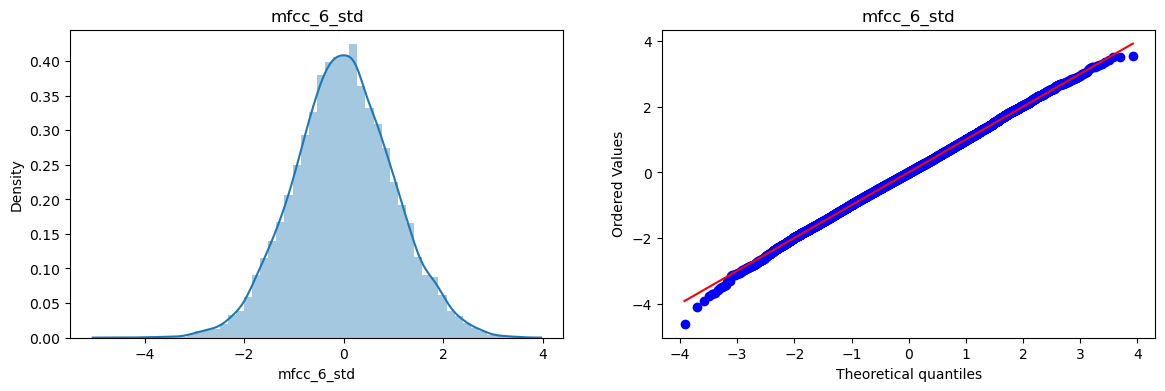

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


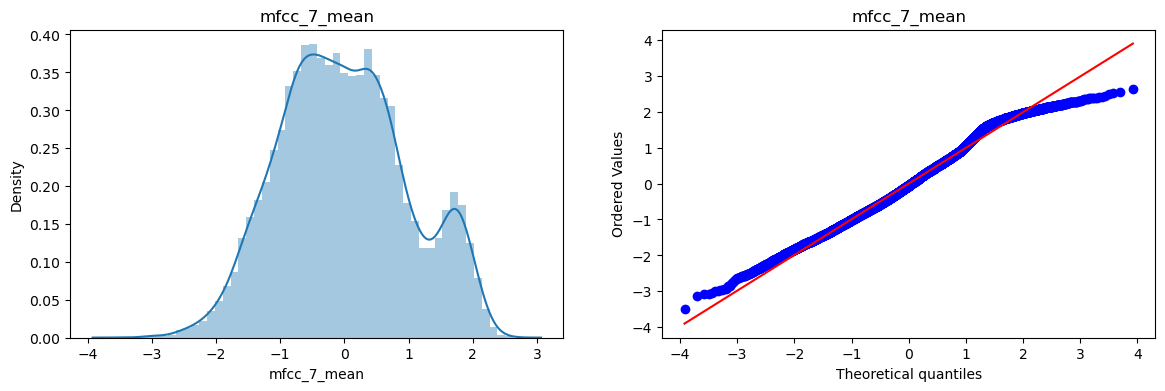

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


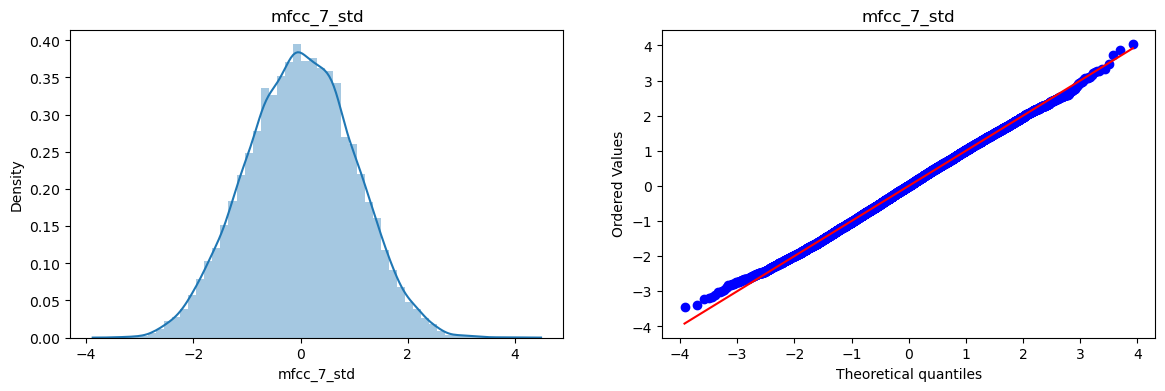

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


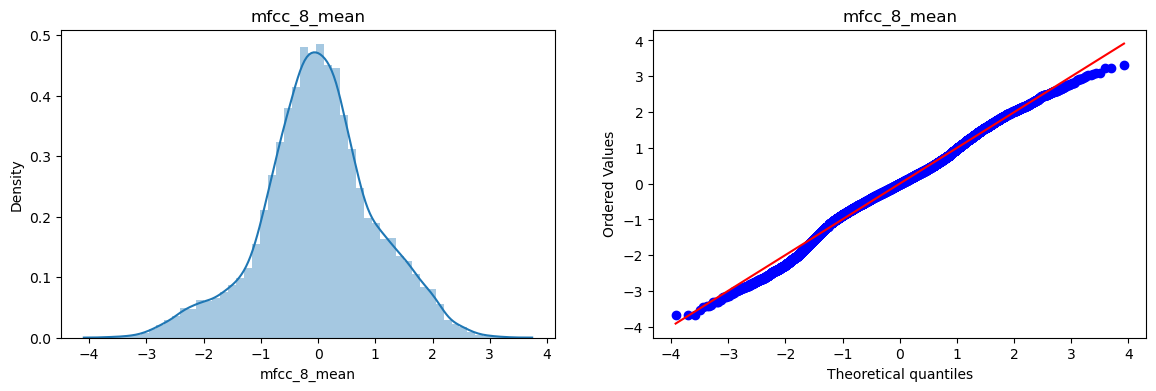

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


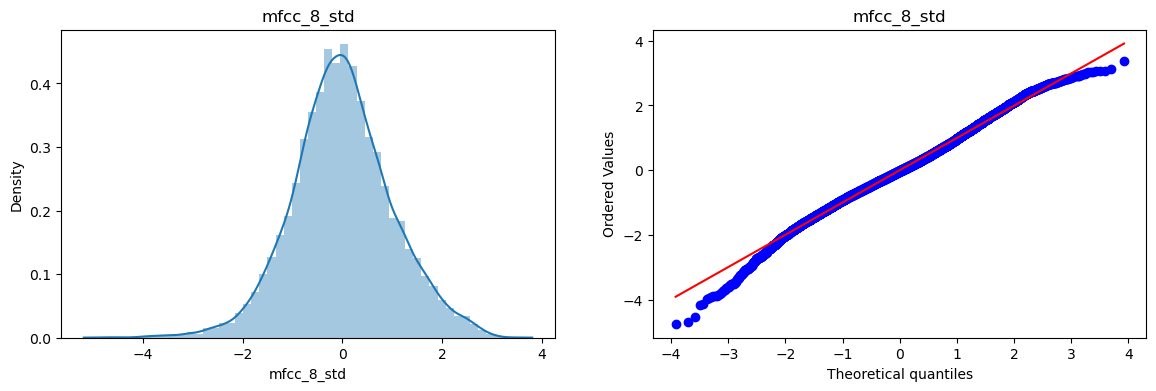

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


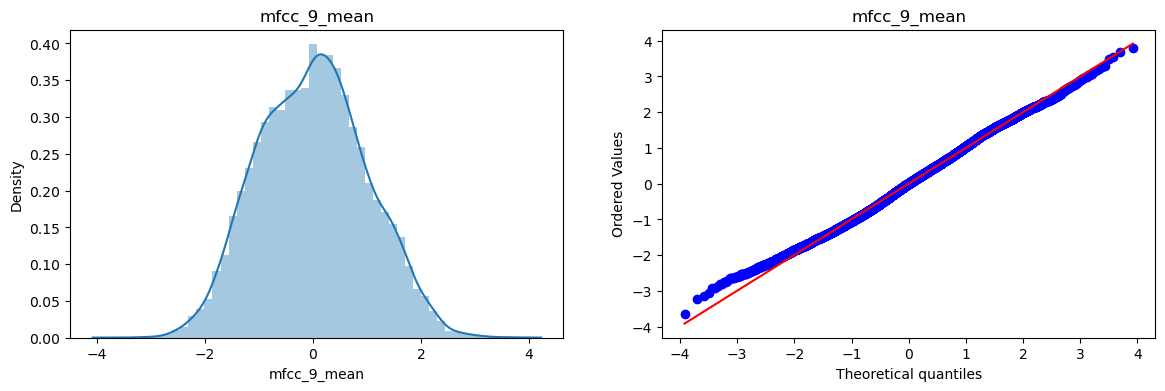

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


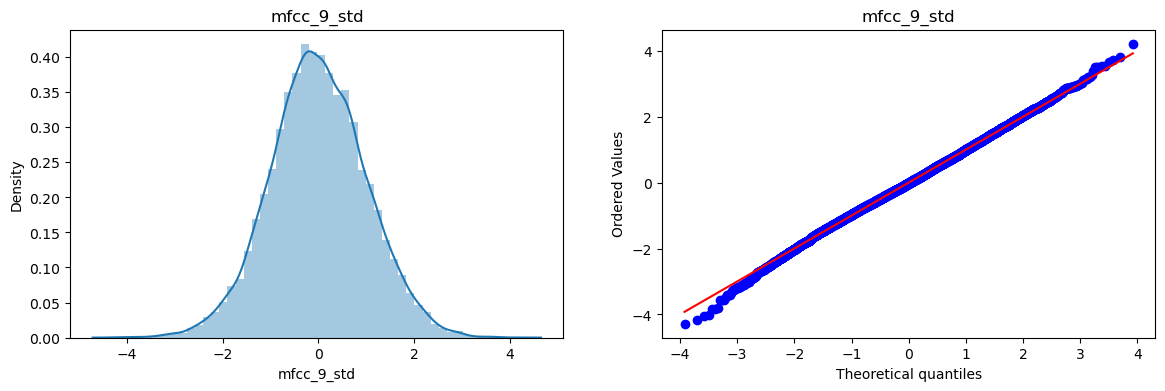

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


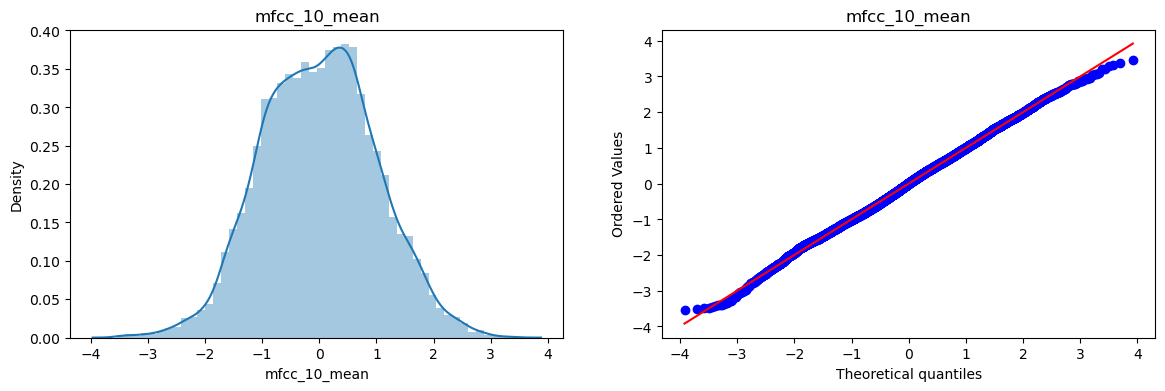

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


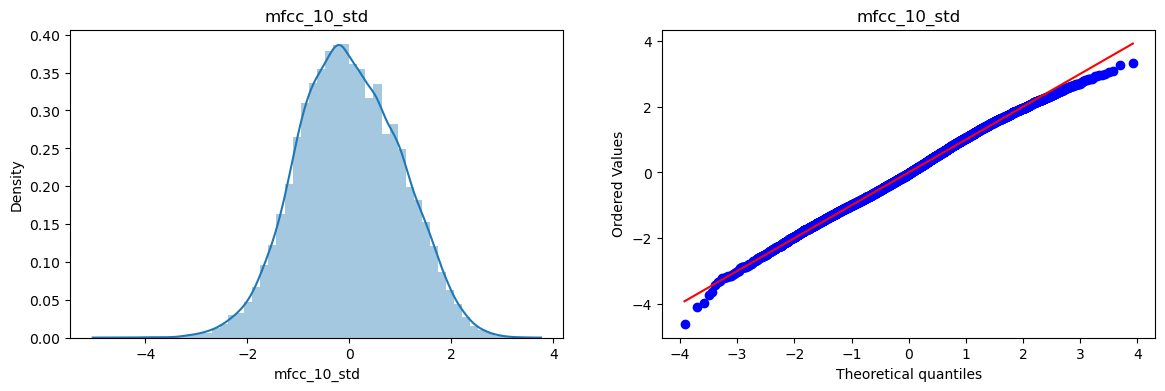

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


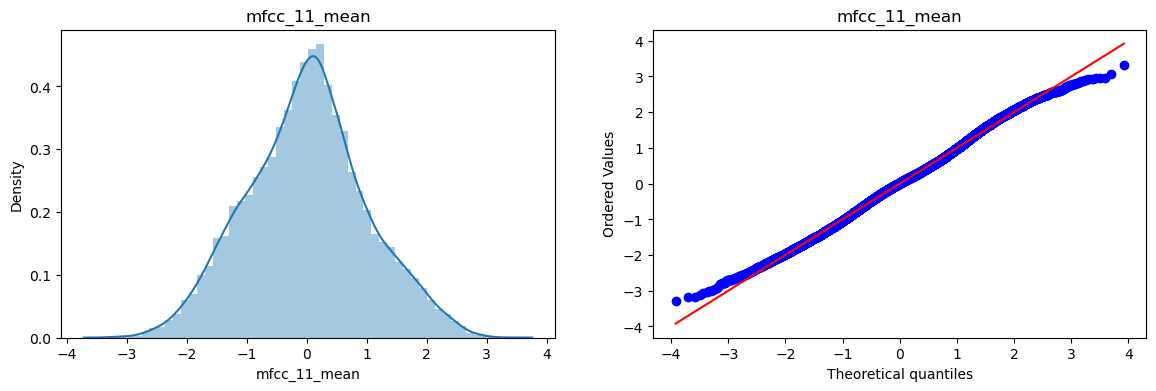

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


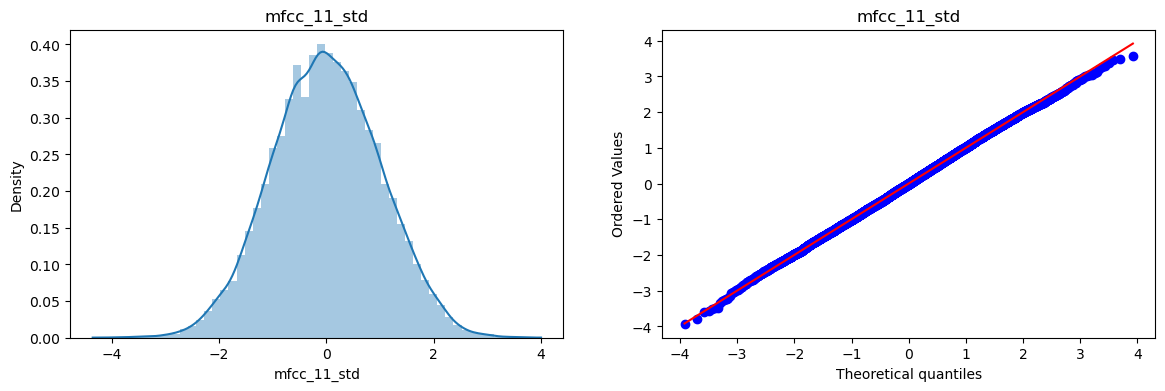

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


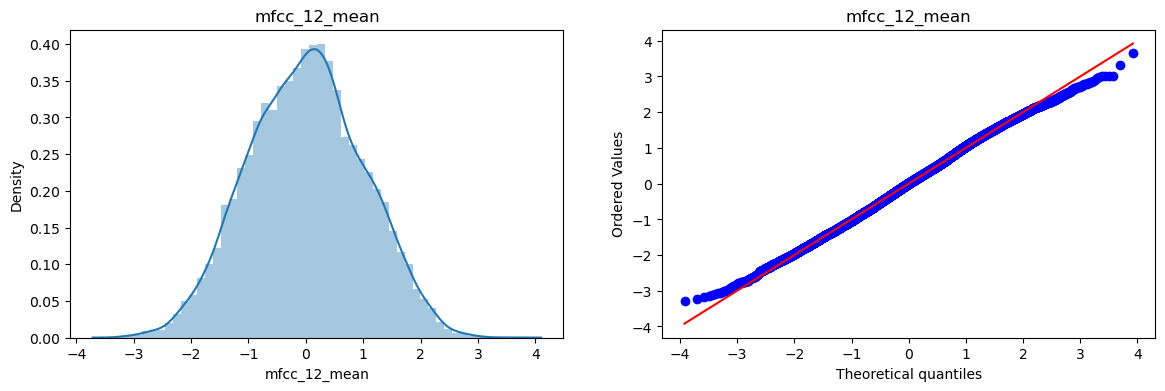

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


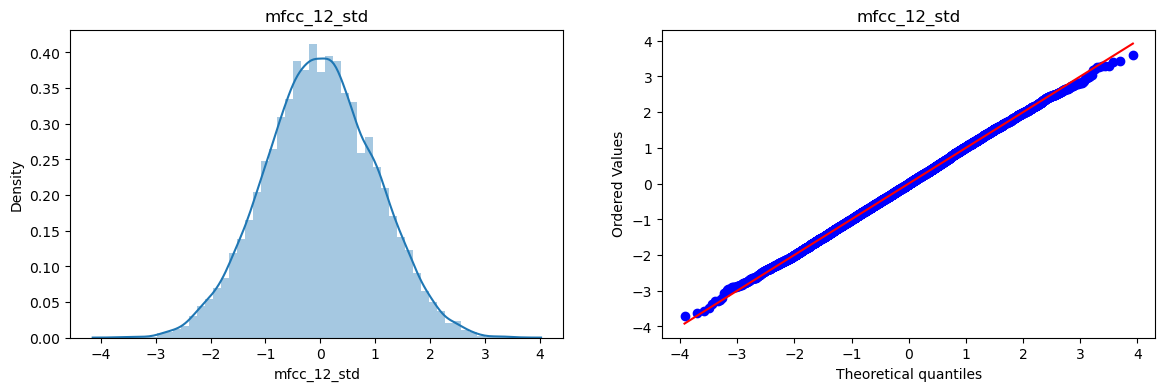

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


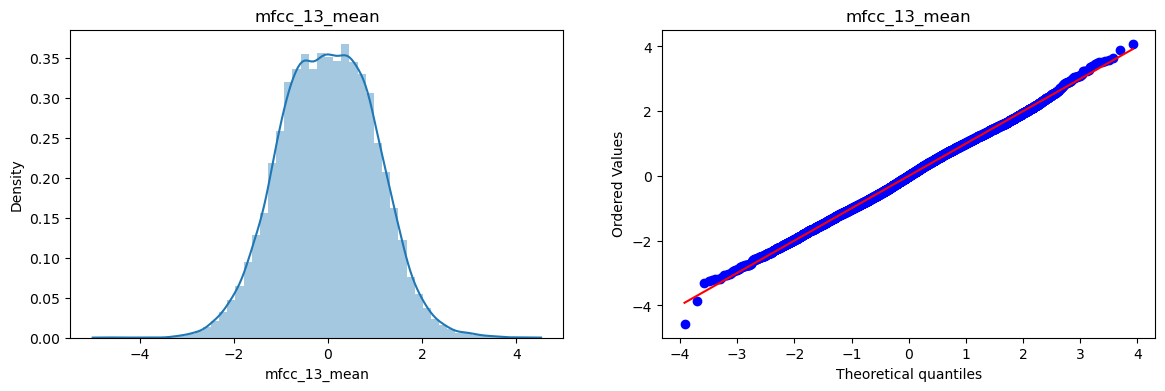

C:\Users\Tisha Biswas\AppData\Local\Temp\ipykernel_43256\2838446824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_train_transformed[col])


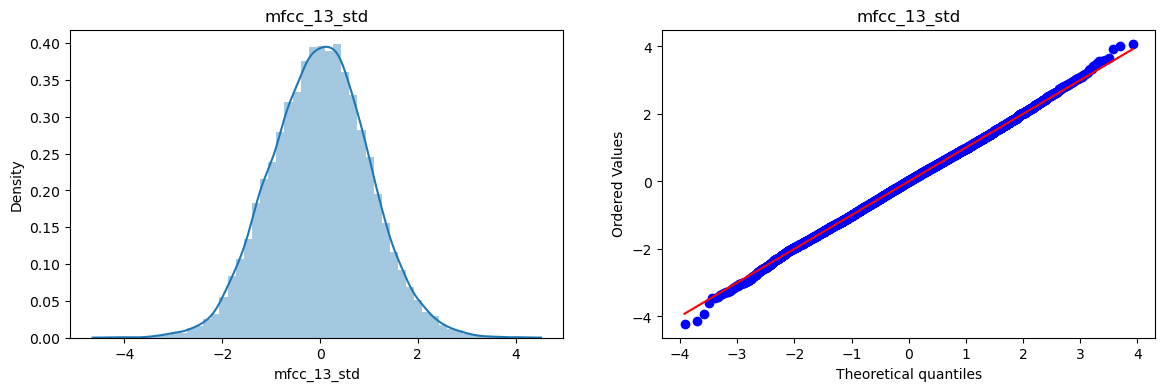

In [20]:
for col in df_X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df_X_train_transformed[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df_X_train_transformed[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [21]:
df_y = pd.DataFrame(y_balanced, columns = ['label'])

grouped = df_y.groupby('label')
result = grouped.size()
print(result)

label
0    7882
1    7882
dtype: int64


In [22]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators=100, random_state= 42, max_features=10  )
rfcl.fit(X_train_transformed, y_balanced)

RandomForestClassifier(max_features=10, random_state=42)

In [23]:
rfcl.score(X_train_transformed, y_balanced)

1.0

In [24]:
rfcl.score(X_test_transformed, y_test)

0.9943596549435966

In [ ]:
y_pred = rfcl.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9943596549435966


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1055
           1       0.99      1.00      1.00      1959

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



In [ ]:
import joblib

joblib.dump(rfcl, 'rfcl.pkl')

['rfcl.pkl']